The following are the features that are going to be used


['weight(kg)', 'HDL', 'LDL', 'Cholesterol', 'hemoglobin', 'hearing(left)', 'eyesight(right)', 'AST', 'waist(cm)', 'triglyceride']

They will be split to training , test and validation so the data can be explored safely , doesn't get affected by test data and achieve good generalization.

In [55]:
import seaborn as sns 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from dataprep import eda 
from sklearn.tree import DecisionTreeClassifier


In [56]:

input_file_path = '/home/hy/Desktop/hanaFiles/ML Assignment-3/Assignment 3_attachments/Assignment 3_attachments/your_data.csv'
data = pd.read_csv(input_file_path)

data


id  weight(kg)  HDL  LDL  Cholesterol  hemoglobin  hearing(left)  \
0            0          60   40   75          172        16.5              1   
1            1          65   57  126          194        16.2              2   
2            2          75   45   93          178        17.4              1   
3            3          95   38  102          180        15.9              1   
4            4          60   44   93          155        15.4              1   
...        ...         ...  ...  ...          ...         ...            ...   
159251  159251          45   72  159          238        14.5              1   
159252  159252          75   64  108          213        14.5              1   
159253  159253          50   87   93          189        10.9              1   
159254  159254          75   55   80          165        14.4              1   
159255  159255          45   87   81          186        14.0              1   

        eyesight(right)  AST  waist(cm)  triglyceride  smoking  
0                   0.6   22       81.0           300        1  
1                   0.7   27       89.0            55        0  
2                   0.5   27       81.0           197        1  
3                   1.2   20      105.0           203        0  
4                   1.0   19       80.5            87        1  
...                 ...  ...        ...           ...      ...  
159251              2.0   25       69.0            47        0  
159252              1.0   21       82.0           202        0  
159253              1.0   15       66.0            45        0  
159254              1.0   22       92.0           148        1  
159255              1.2   21       76.4            87        0  

[159256 rows x 12 columns]

In [57]:
# drop id column as it is redundant just numbering
data = data.drop("id", axis=1)
data


weight(kg)  HDL  LDL  Cholesterol  hemoglobin  hearing(left)  \
0               60   40   75          172        16.5              1   
1               65   57  126          194        16.2              2   
2               75   45   93          178        17.4              1   
3               95   38  102          180        15.9              1   
4               60   44   93          155        15.4              1   
...            ...  ...  ...          ...         ...            ...   
159251          45   72  159          238        14.5              1   
159252          75   64  108          213        14.5              1   
159253          50   87   93          189        10.9              1   
159254          75   55   80          165        14.4              1   
159255          45   87   81          186        14.0              1   

        eyesight(right)  AST  waist(cm)  triglyceride  smoking  
0                   0.6   22       81.0           300        1  
1                   0.7   27       89.0            55        0  
2                   0.5   27       81.0           197        1  
3                   1.2   20      105.0           203        0  
4                   1.0   19       80.5            87        1  
...                 ...  ...        ...           ...      ...  
159251              2.0   25       69.0            47        0  
159252              1.0   21       82.0           202        0  
159253              1.0   15       66.0            45        0  
159254              1.0   22       92.0           148        1  
159255              1.2   21       76.4            87        0  

[159256 rows x 11 columns]

In [58]:
#train test split 
# 70% train
#15 % each of test and validate

train_data, test_val_data = train_test_split(data, test_size=0.3, random_state=42)
test_data, val_data = train_test_split(test_val_data, test_size=0.5, random_state=42)


train_file_path = 'train_data.csv'
test_file_path = 'test_data.csv'
validation_file_path = 'validation_data.csv'

train_data.to_csv(train_file_path, index=None)
test_data.to_csv(test_file_path, index=None)
val_data.to_csv(validation_file_path, index=None)

print(f"Data split and saved into {train_file_path}, {test_file_path}, and {validation_file_path}.")

Data split and saved into train_data.csv, test_data.csv, and validation_data.csv.


In [59]:
train_data.head()

weight(kg)  HDL  LDL  Cholesterol  hemoglobin  hearing(left)  \
17406          70   41   93          172        14.7              1   
61303          60   77  116          205        14.7              1   
71781          50   62   95          186        13.3              1   
67014          55   61   95          167        12.9              1   
73322          55   46  104          171        14.0              2   

       eyesight(right)  AST  waist(cm)  triglyceride  smoking  
17406              0.8   24       83.2           190        1  
61303              1.2   34       76.0            59        1  
71781              0.7   17       64.0           145        1  
67014              1.0   38       76.0            59        0  
73322              1.0   25       75.0           110        0

In [60]:
train_data .shape

(111479, 11)

In [61]:
train_data.dtypes

weight(kg)           int64
HDL                  int64
LDL                  int64
Cholesterol          int64
hemoglobin         float64
hearing(left)        int64
eyesight(right)    float64
AST                  int64
waist(cm)          float64
triglyceride         int64
smoking              int64
dtype: object

In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111479 entries, 17406 to 121958
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   weight(kg)       111479 non-null  int64  
 1   HDL              111479 non-null  int64  
 2   LDL              111479 non-null  int64  
 3   Cholesterol      111479 non-null  int64  
 4   hemoglobin       111479 non-null  float64
 5   hearing(left)    111479 non-null  int64  
 6   eyesight(right)  111479 non-null  float64
 7   AST              111479 non-null  int64  
 8   waist(cm)        111479 non-null  float64
 9   triglyceride     111479 non-null  int64  
 10  smoking          111479 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 10.2 MB


In [63]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23888 entries, 115097 to 122328
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   weight(kg)       23888 non-null  int64  
 1   HDL              23888 non-null  int64  
 2   LDL              23888 non-null  int64  
 3   Cholesterol      23888 non-null  int64  
 4   hemoglobin       23888 non-null  float64
 5   hearing(left)    23888 non-null  int64  
 6   eyesight(right)  23888 non-null  float64
 7   AST              23888 non-null  int64  
 8   waist(cm)        23888 non-null  float64
 9   triglyceride     23888 non-null  int64  
 10  smoking          23888 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 2.2 MB


In [64]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23889 entries, 5959 to 137664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   weight(kg)       23889 non-null  int64  
 1   HDL              23889 non-null  int64  
 2   LDL              23889 non-null  int64  
 3   Cholesterol      23889 non-null  int64  
 4   hemoglobin       23889 non-null  float64
 5   hearing(left)    23889 non-null  int64  
 6   eyesight(right)  23889 non-null  float64
 7   AST              23889 non-null  int64  
 8   waist(cm)        23889 non-null  float64
 9   triglyceride     23889 non-null  int64  
 10  smoking          23889 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 2.2 MB


No null values exist in the data 


In [65]:
features =['weight(kg)', 'HDL', 'LDL', 'Cholesterol', 'hemoglobin', 'hearing(left)', 'eyesight(right)', 'AST', 'waist(cm)', 'triglyceride']

## Data analysis 
I will be using only the train data in this stage 
Univariate , bivariate and multivariate analysis will be used

### Univariate analysis

In [66]:
x = train_data.drop("smoking",axis=1)
target = train_data["smoking"]

In [67]:
x

weight(kg)  HDL  LDL  Cholesterol  hemoglobin  hearing(left)  \
17406           70   41   93          172        14.7              1   
61303           60   77  116          205        14.7              1   
71781           50   62   95          186        13.3              1   
67014           55   61   95          167        12.9              1   
73322           55   46  104          171        14.0              2   
...            ...  ...  ...          ...         ...            ...   
119879          80   42  143          225        15.3              1   
103694          65   48   90          169        15.9              1   
131932          60   74   74          166        13.8              1   
146867          85   42  116          175        15.0              1   
121958          85   51  209          295        15.2              1   

        eyesight(right)  AST  waist(cm)  triglyceride  
17406               0.8   24       83.2           190  
61303               1.2   34       76.0            59  
71781               0.7   17       64.0           145  
67014               1.0   38       76.0            59  
73322               1.0   25       75.0           110  
...                 ...  ...        ...           ...  
119879              1.2   41       88.0           204  
103694              1.2   24       79.0           156  
131932              1.0   21       81.0            93  
146867              1.5   33       97.0            86  
121958              1.0   17       88.0           184  

[111479 rows x 10 columns]

In [68]:
for f in features:
    unique_values = data[f].nunique()
    print(f"Number of Unique values in the {f} column:", unique_values)

Number of Unique values in the weight(kg) column: 28
Number of Unique values in the HDL column: 108
Number of Unique values in the LDL column: 222
Number of Unique values in the Cholesterol column: 227
Number of Unique values in the hemoglobin column: 134
Number of Unique values in the hearing(left) column: 2
Number of Unique values in the eyesight(right) column: 17
Number of Unique values in the AST column: 140
Number of Unique values in the waist(cm) column: 531
Number of Unique values in the triglyceride column: 392


hearing left is a caregorical feature

In [69]:
x = pd.get_dummies(x, columns=['hearing(left)'], prefix='hearing(left)').astype(int)


In [70]:
x

weight(kg)  HDL  LDL  Cholesterol  hemoglobin  eyesight(right)  AST  \
17406           70   41   93          172          14                0   24   
61303           60   77  116          205          14                1   34   
71781           50   62   95          186          13                0   17   
67014           55   61   95          167          12                1   38   
73322           55   46  104          171          14                1   25   
...            ...  ...  ...          ...         ...              ...  ...   
119879          80   42  143          225          15                1   41   
103694          65   48   90          169          15                1   24   
131932          60   74   74          166          13                1   21   
146867          85   42  116          175          15                1   33   
121958          85   51  209          295          15                1   17   

        waist(cm)  triglyceride  hearing(left)_1  hearing(left)_2  
17406          83           190                1                0  
61303          76            59                1                0  
71781          64           145                1                0  
67014          76            59                1                0  
73322          75           110                0                1  
...           ...           ...              ...              ...  
119879         88           204                1                0  
103694         79           156                1                0  
131932         81            93                1                0  
146867         97            86                1                0  
121958         88           184                1                0  

[111479 rows x 11 columns]

In [71]:
# split data to categorical and non categorical data to ease visualization

non_cat_data = x.drop(["hearing(left)_1", "hearing(left)_2"], axis=1)

# Select only "hearing(left)_1" and "hearing(left)_2" columns for cat_data
cat_data = x[["hearing(left)_1", "hearing(left)_2"]]



In [72]:
non_cat_data.head()


weight(kg)  HDL  LDL  Cholesterol  hemoglobin  eyesight(right)  AST  \
17406          70   41   93          172          14                0   24   
61303          60   77  116          205          14                1   34   
71781          50   62   95          186          13                0   17   
67014          55   61   95          167          12                1   38   
73322          55   46  104          171          14                1   25   

       waist(cm)  triglyceride  
17406         83           190  
61303         76            59  
71781         64           145  
67014         76            59  
73322         75           110

In [73]:
cat_data.head()

hearing(left)_1  hearing(left)_2
17406                1                0
61303                1                0
71781                1                0
67014                1                0
73322                0                1

In [74]:

x.head()

weight(kg)  HDL  LDL  Cholesterol  hemoglobin  eyesight(right)  AST  \
17406          70   41   93          172          14                0   24   
61303          60   77  116          205          14                1   34   
71781          50   62   95          186          13                0   17   
67014          55   61   95          167          12                1   38   
73322          55   46  104          171          14                1   25   

       waist(cm)  triglyceride  hearing(left)_1  hearing(left)_2  
17406         83           190                1                0  
61303         76            59                1                0  
71781         64           145                1                0  
67014         76            59                1                0  
73322         75           110                0                1

array([[<Axes: title={'center': 'weight(kg)'}>,
        <Axes: title={'center': 'HDL'}>, <Axes: title={'center': 'LDL'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'eyesight(right)'}>],
       [<Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'waist(cm)'}>,
        <Axes: title={'center': 'triglyceride'}>]], dtype=object)

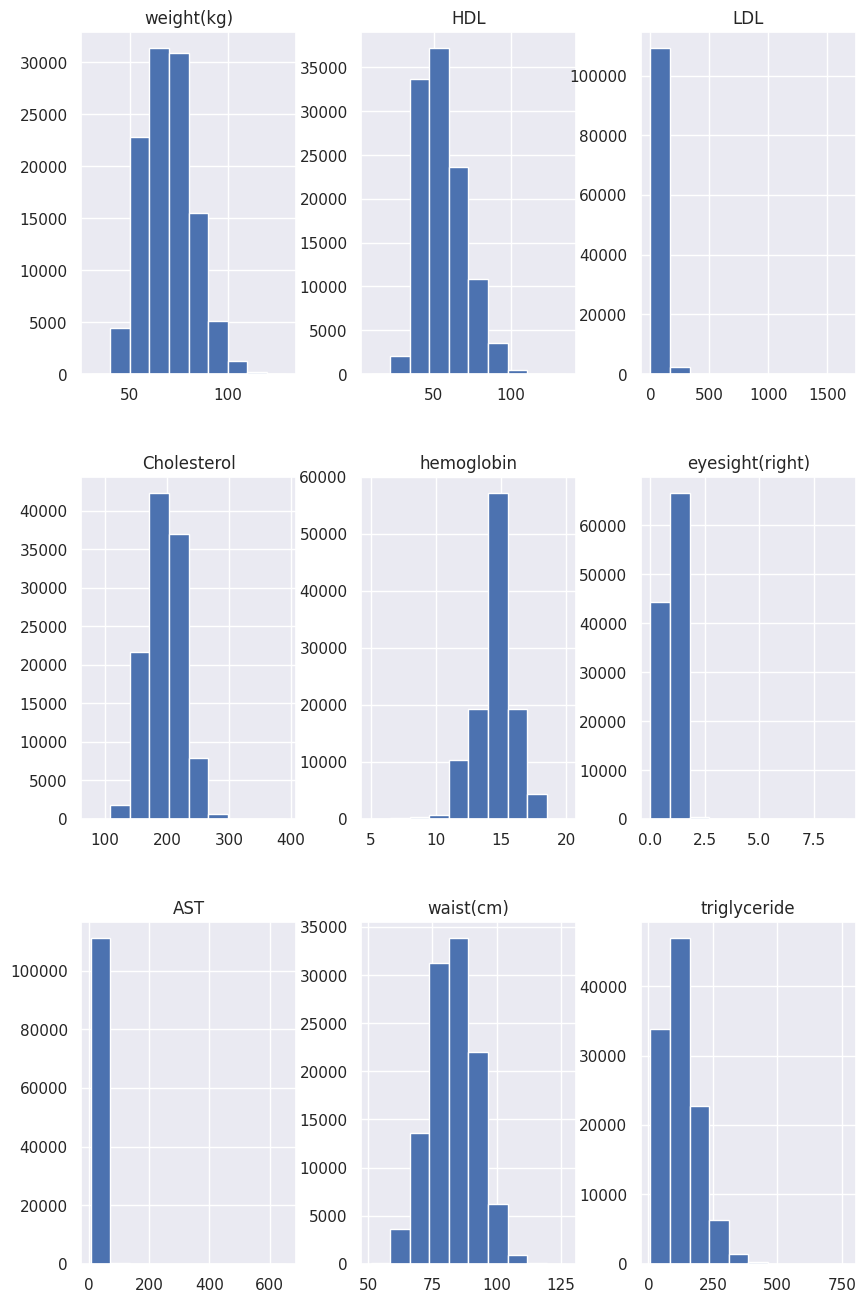

In [75]:
sns.set(rc={'figure.figsize':(10,16)})
non_cat_data.hist()

From the histogram, most features are distributed a bit normally 
ldl, eye sight , ast and trigleceride are left skewed
HDL is a skewed slightly as well

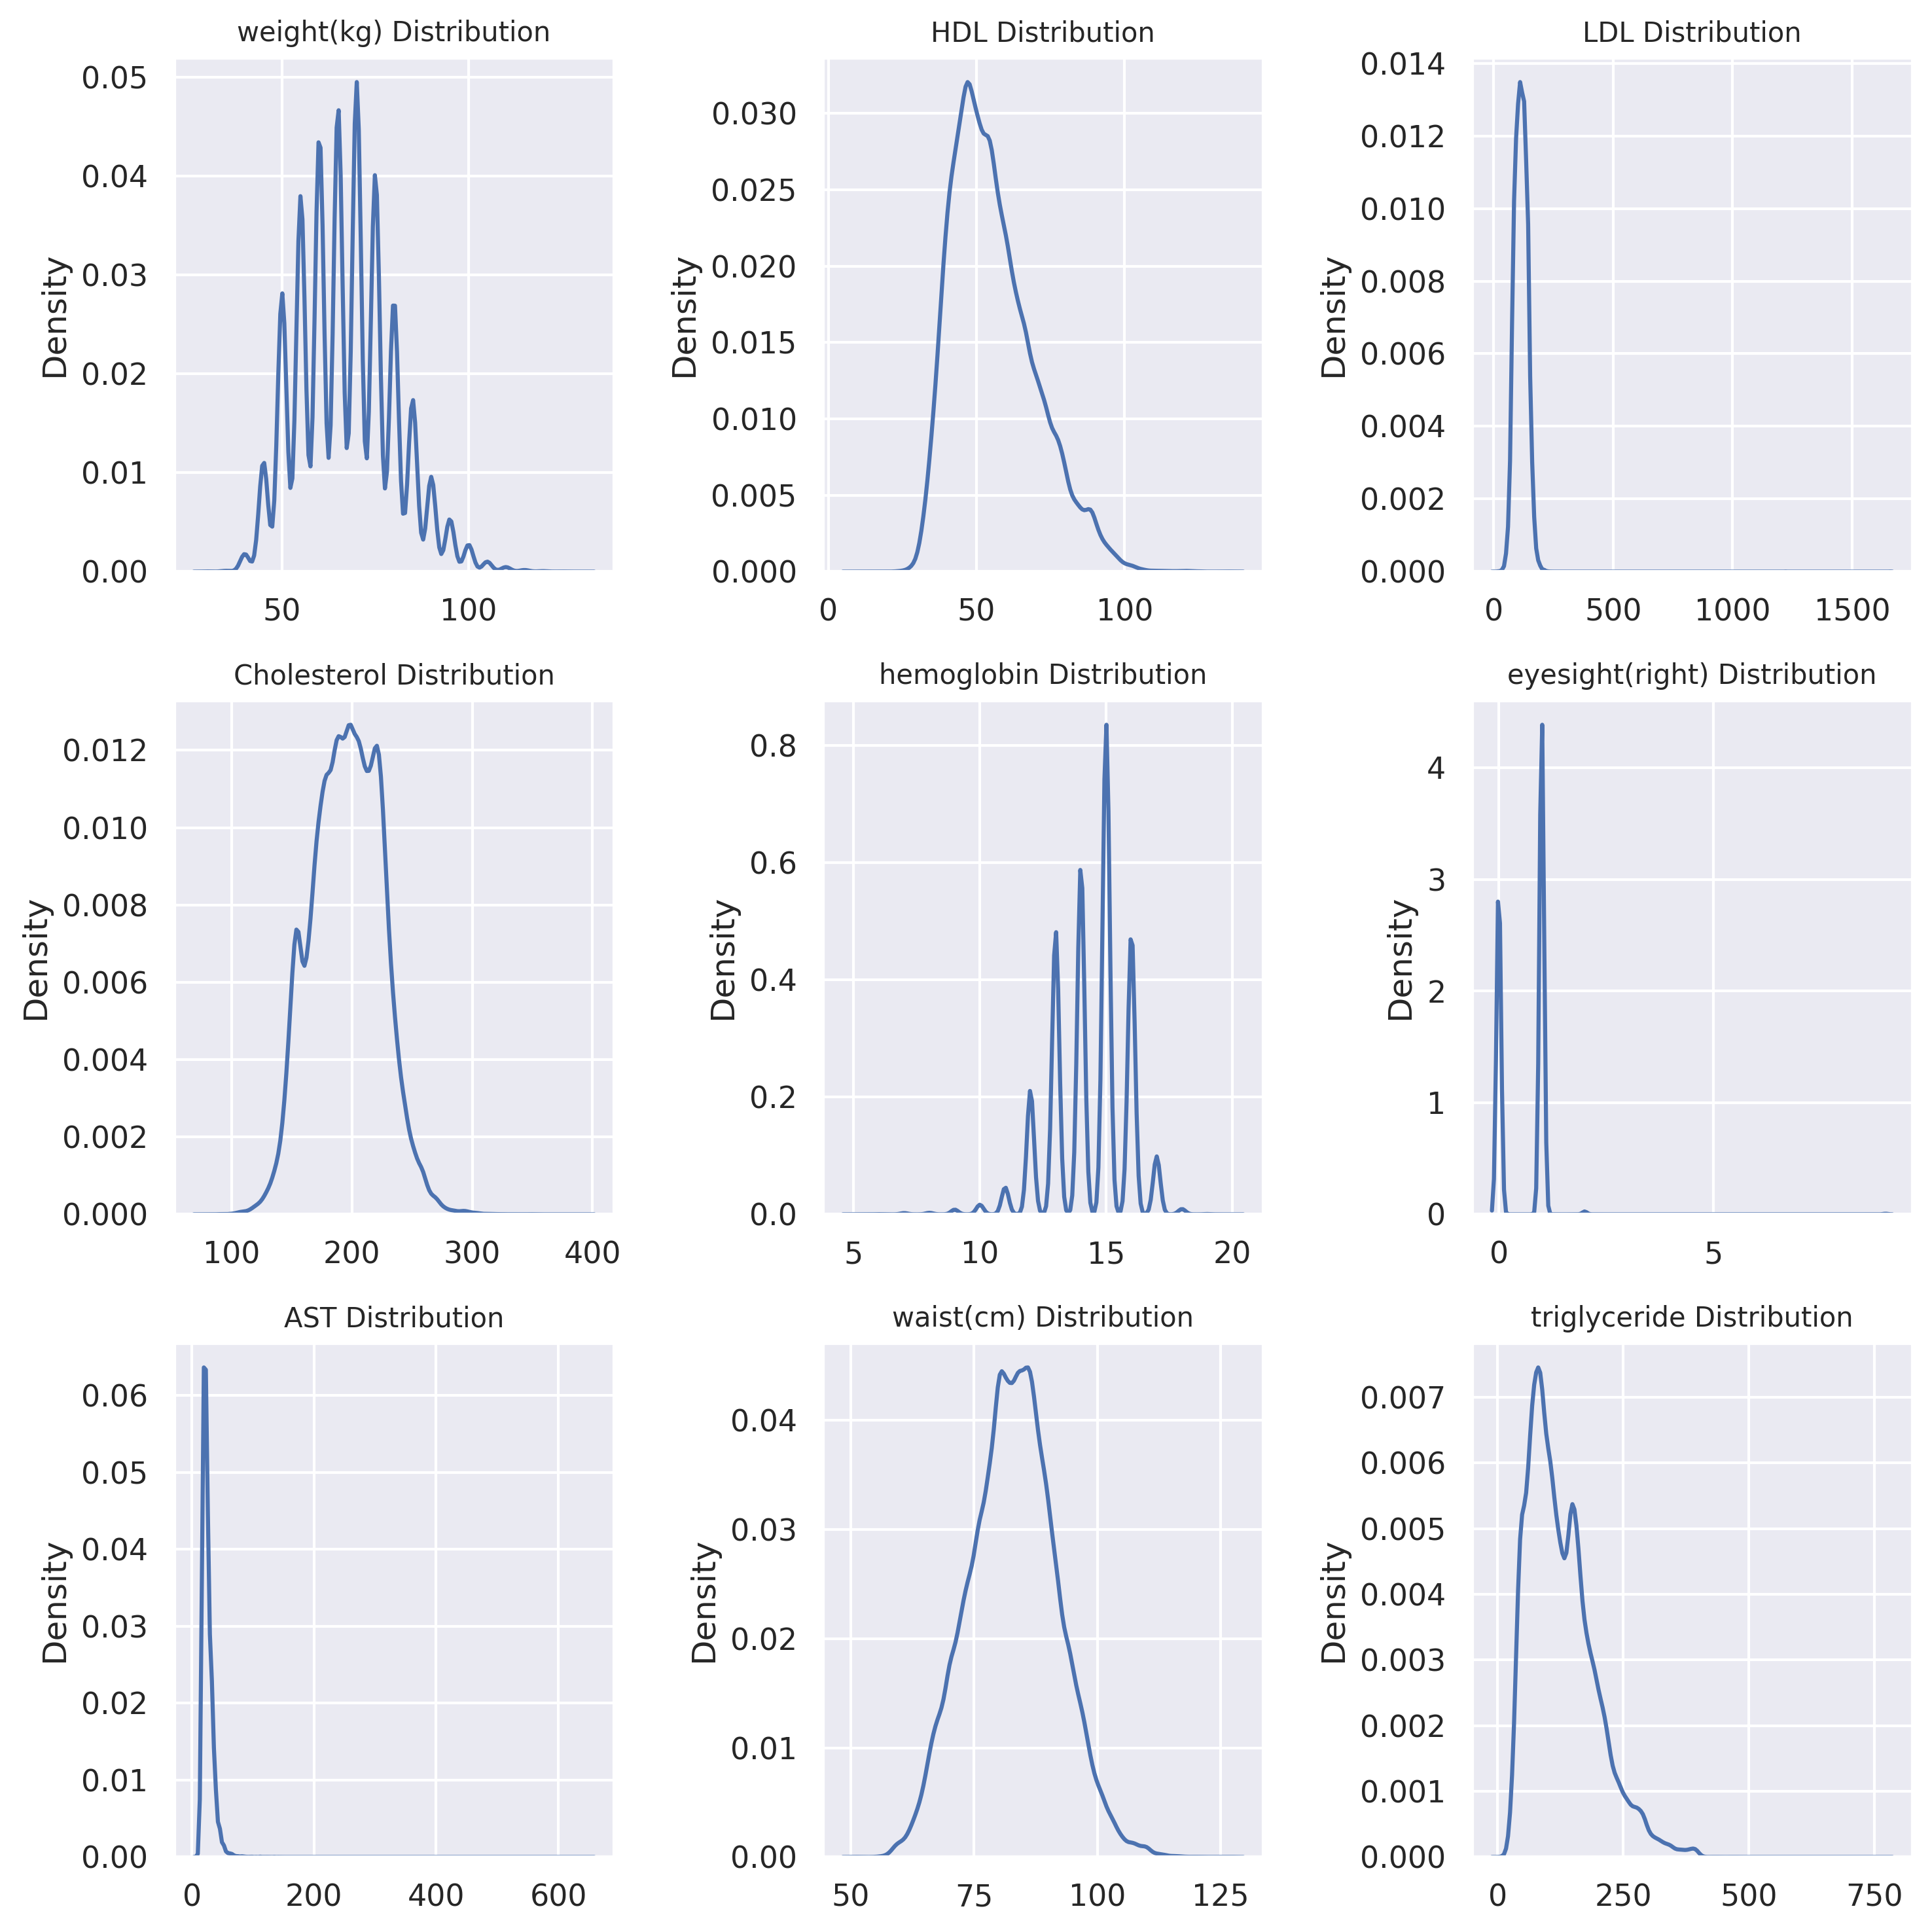

In [76]:
fig, ax = plt.subplots(3, 3, figsize = (10, 10), dpi = 300)
ax = ax.flatten()

for i,column in enumerate(non_cat_data):
        
    sns.kdeplot(x[column], ax=ax[i])
    
    ax[i].set_title(f'{column} Distribution', size = 10)
    ax[i].set_xlabel(None)
plt.tight_layout()


this distribution show more details that were not spotted in the histogram

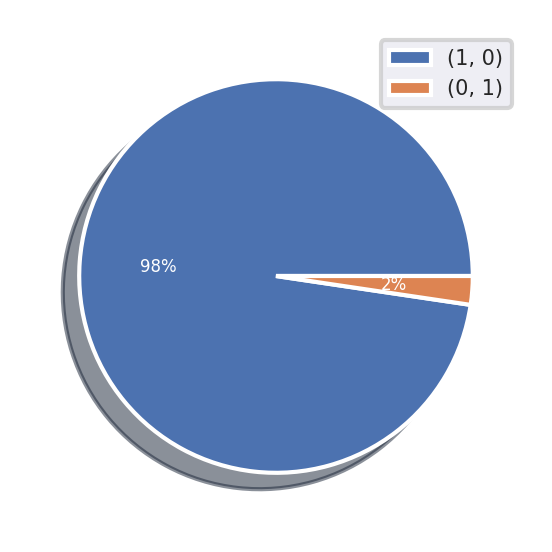

In [77]:
plt.figure(figsize=(2,2), dpi=300)

plt.pie(
    cat_data.value_counts(), 
    shadow = True, 
    autopct = '%1.f%%',
    textprops = {'size' : 4, 'color' : 'white'}
    )

plt.legend(cat_data.value_counts().index,loc='upper right',fontsize = 5)
plt.tight_layout()
plt.show()

Visualization of non categorical data
in our data only one feature is categorical which is left hearing 
as show in the pie chart 2% have value of 2

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


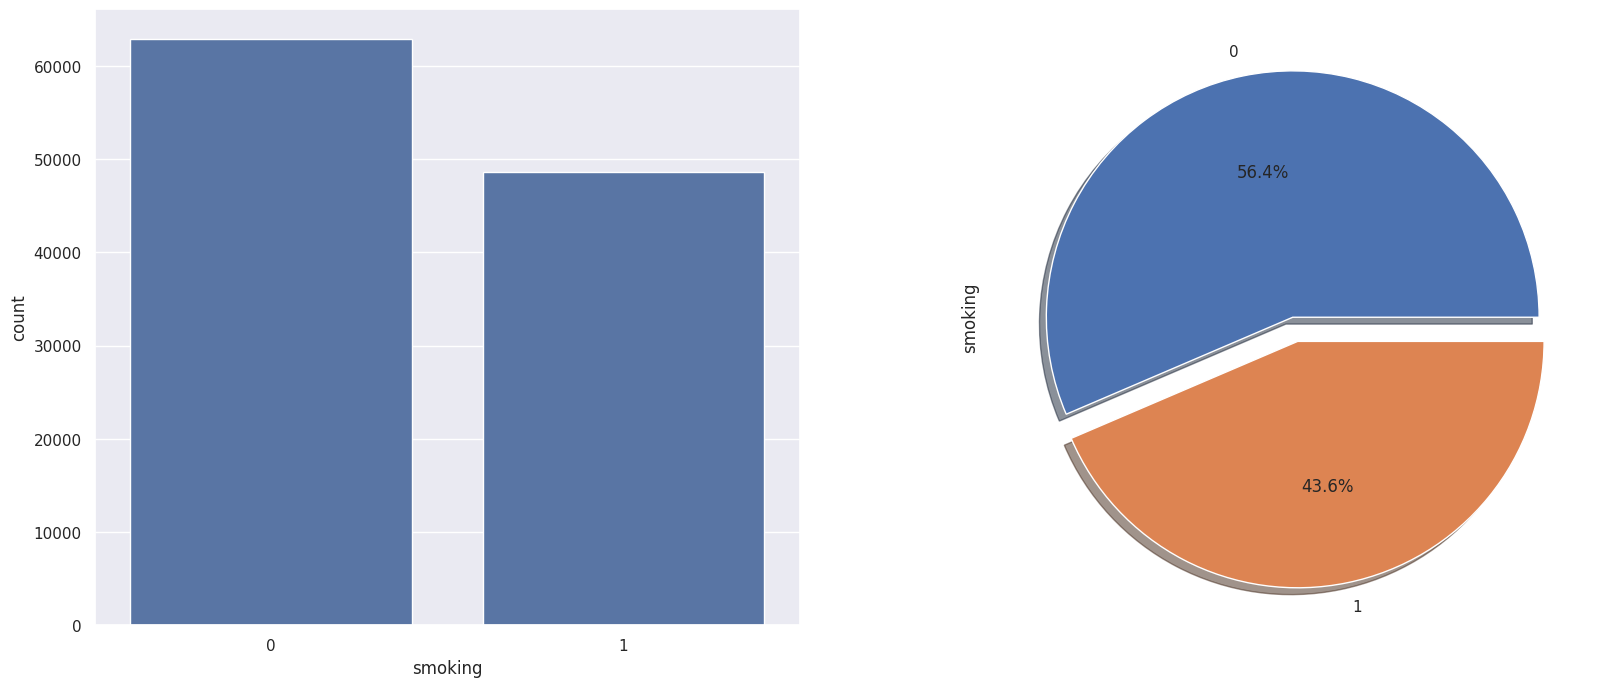

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=train_data, x='smoking', ax=ax[0])
target.value_counts().plot.pie(ax=ax[1], shadow=True, explode=[0, 0.1], autopct="%1.1f%%")

plt.show()

this shows count of smokers vs smokers in the training data

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


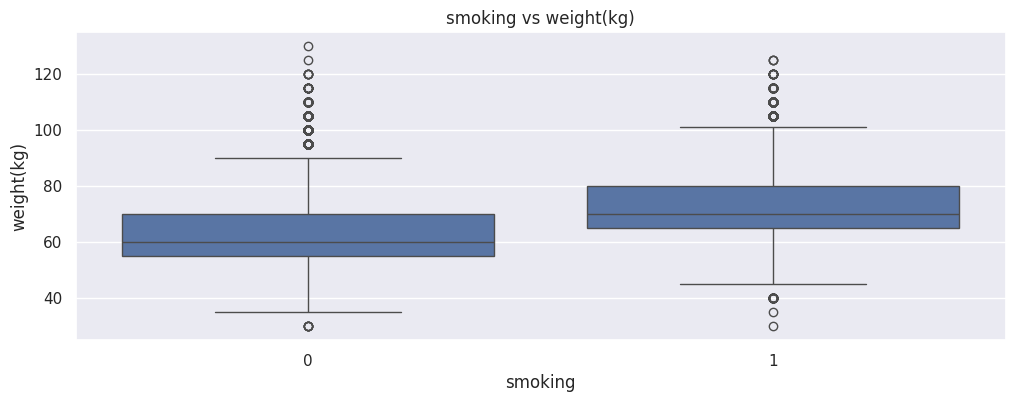

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


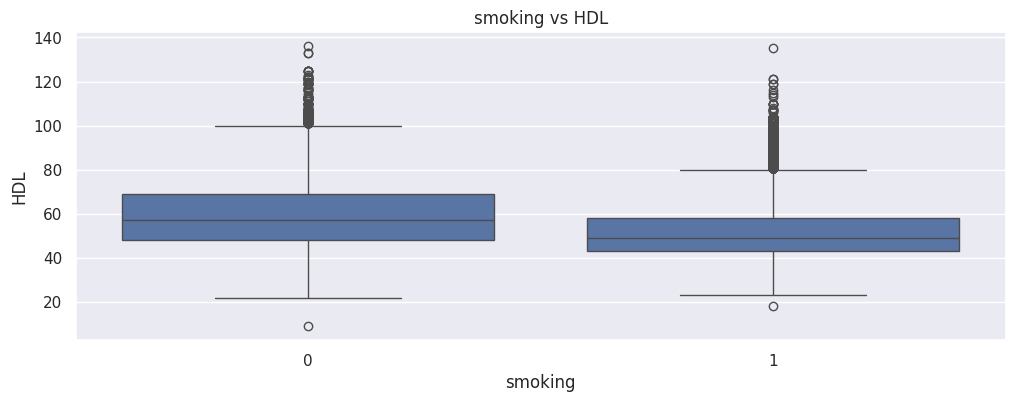

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


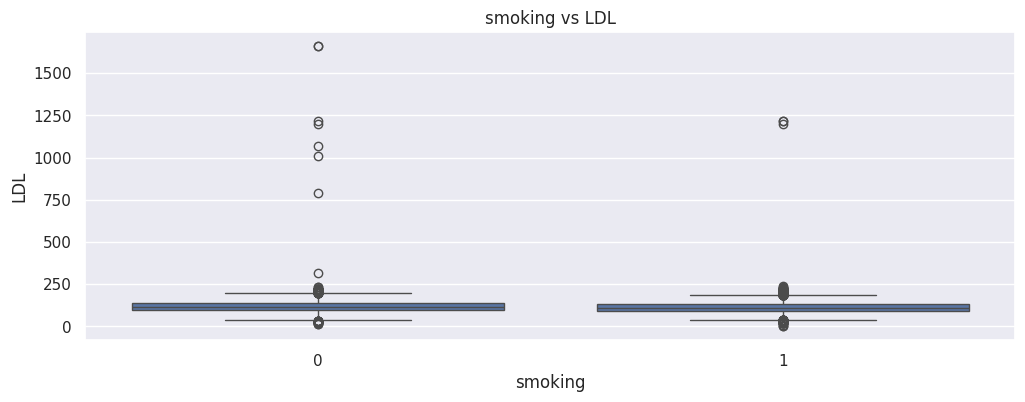

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


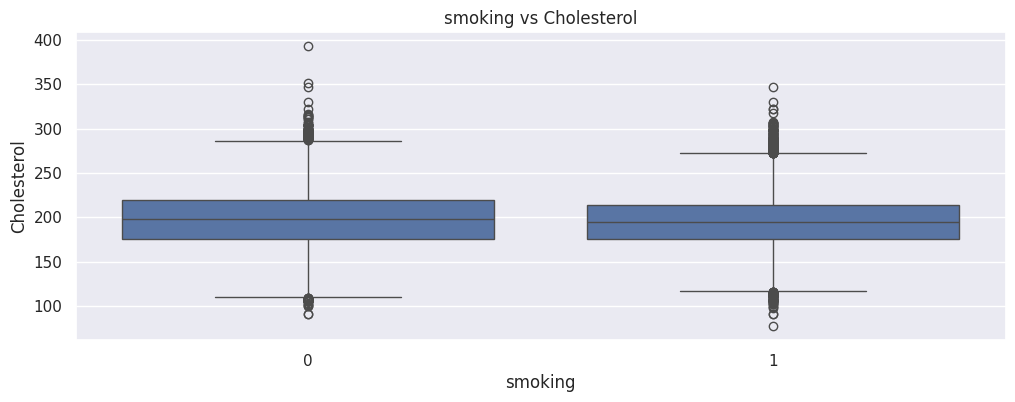

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


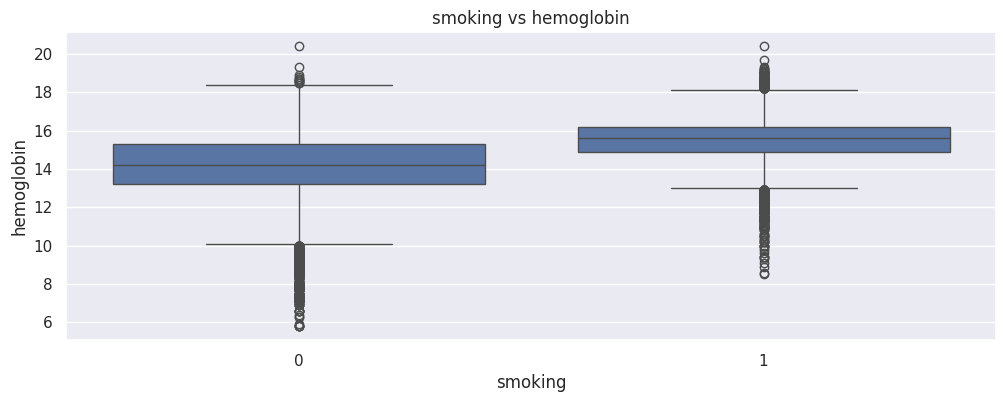

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


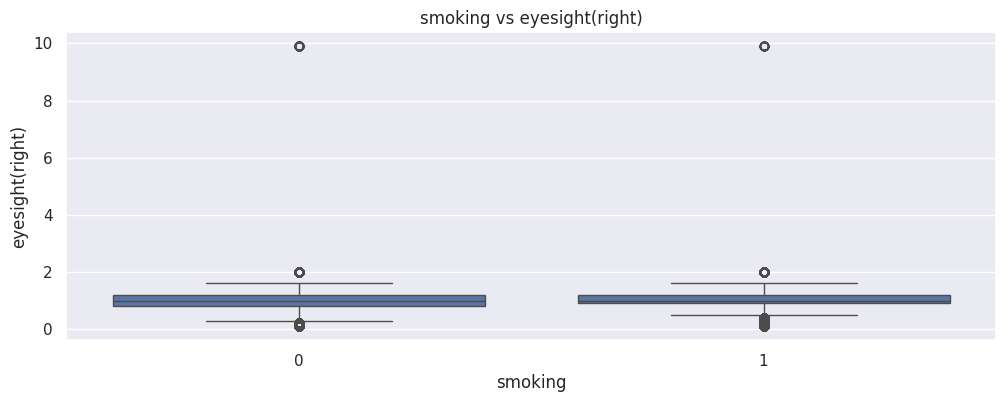

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


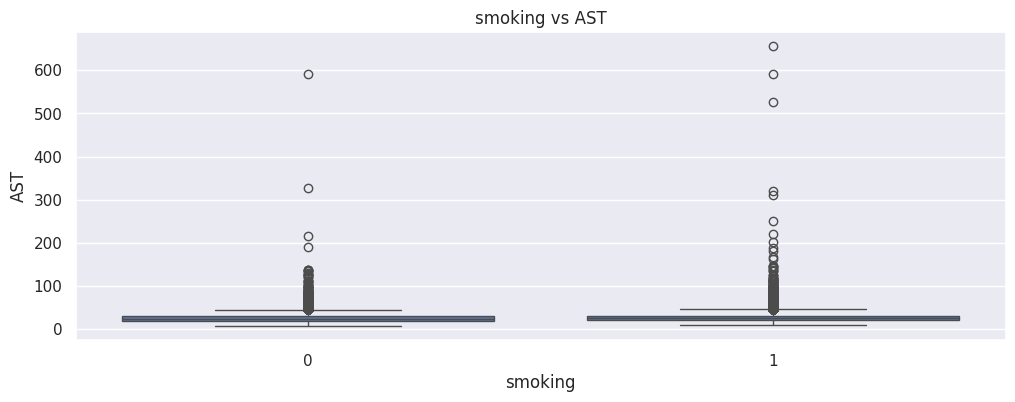

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


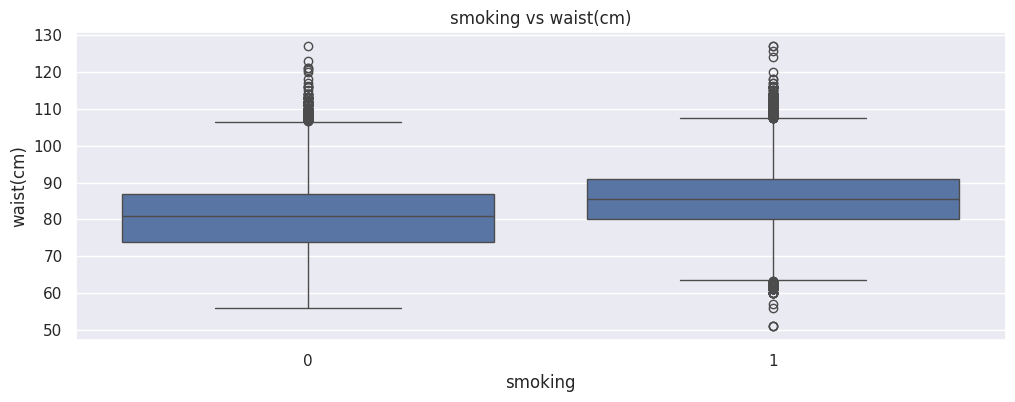

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


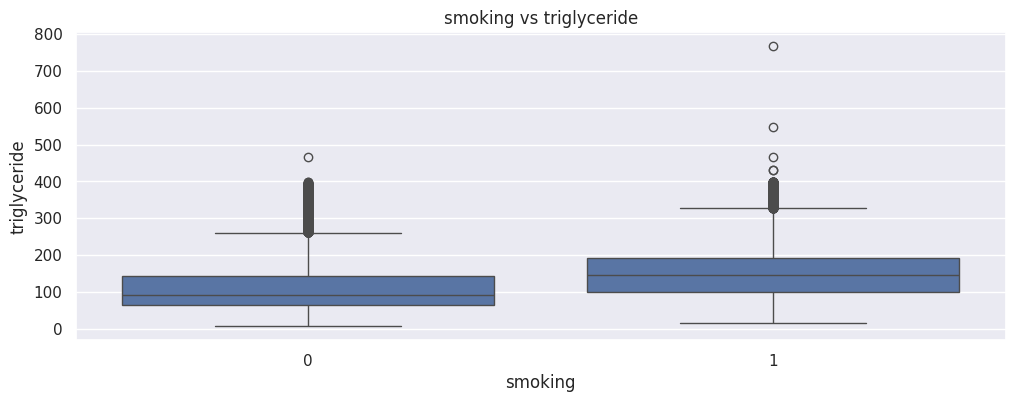

In [79]:
for i,feat in enumerate(non_cat_data):
    plt.figure(figsize=(12,4))
    sns.boxplot(data=train_data, x='smoking', y=feat)
    plt.title('smoking vs ' + feat)
    plt.show()

This shows box plots of each numerical feature vs smokers and non smokers
this plot shows percentils and outliers and helps decide which values to remove outliers on

In [80]:
statistics = pd.DataFrame({
    'Mean': x.mean(),
    'Median': x.median(),
    'Range': x.max() - x.min(),
    'Variance': x.var(),
    'Standard Deviation': x.std()
})

In [81]:
print(statistics)

                       Mean  Median  Range     Variance  Standard Deviation
weight(kg)        67.111887    65.0    100   157.678819           12.557023
HDL               55.855524    54.0    127   194.703521           13.953620
LDL              114.588425   114.0   1659   789.943757           28.105938
Cholesterol      195.776505   196.0    316   808.096312           28.427035
hemoglobin        14.339598    15.0     15     2.121078            1.456392
eyesight(right)    0.610806     1.0      9     0.295583            0.543676
AST               25.529427    24.0    650    90.384697            9.507087
waist(cm)         82.904870    83.0     76    79.902709            8.938831
triglyceride     127.597601   114.0    758  4392.355997           66.274852
hearing(left)_1    0.976552     1.0      1     0.022899            0.151323
hearing(left)_2    0.023448     0.0      1     0.022899            0.151323


In [82]:
statistics.to_csv('statistics_summary.csv')


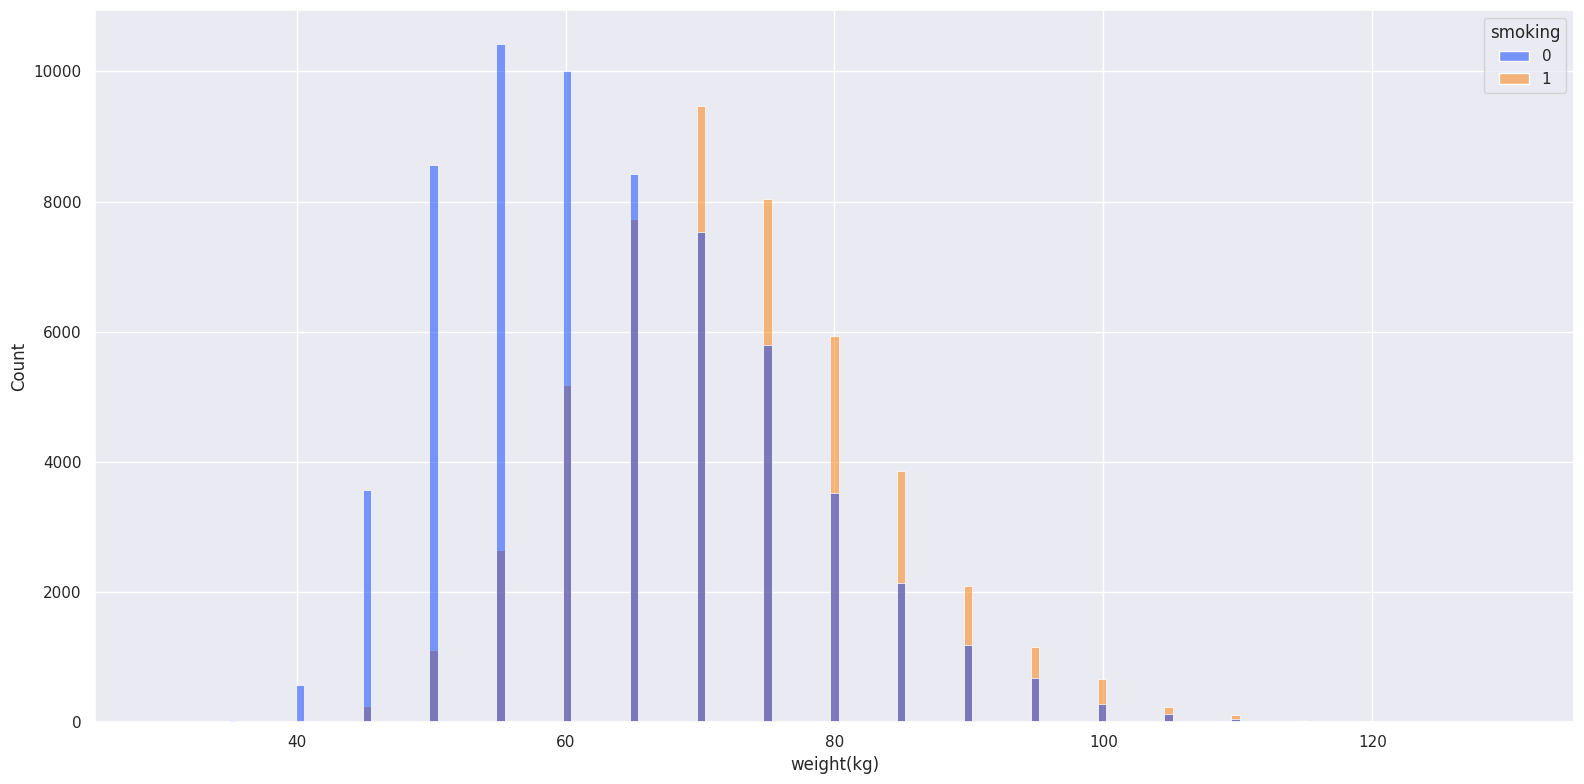

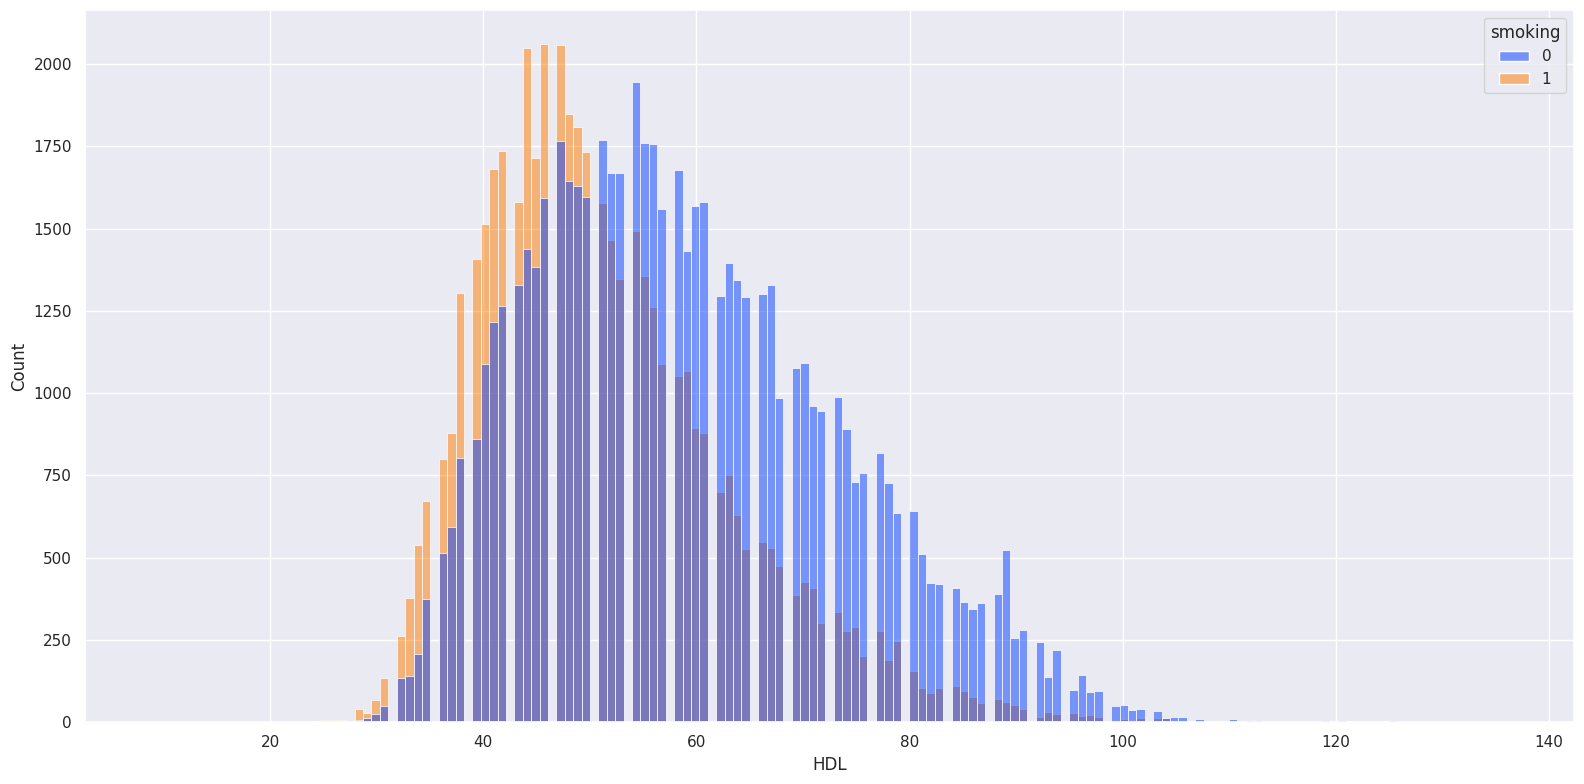

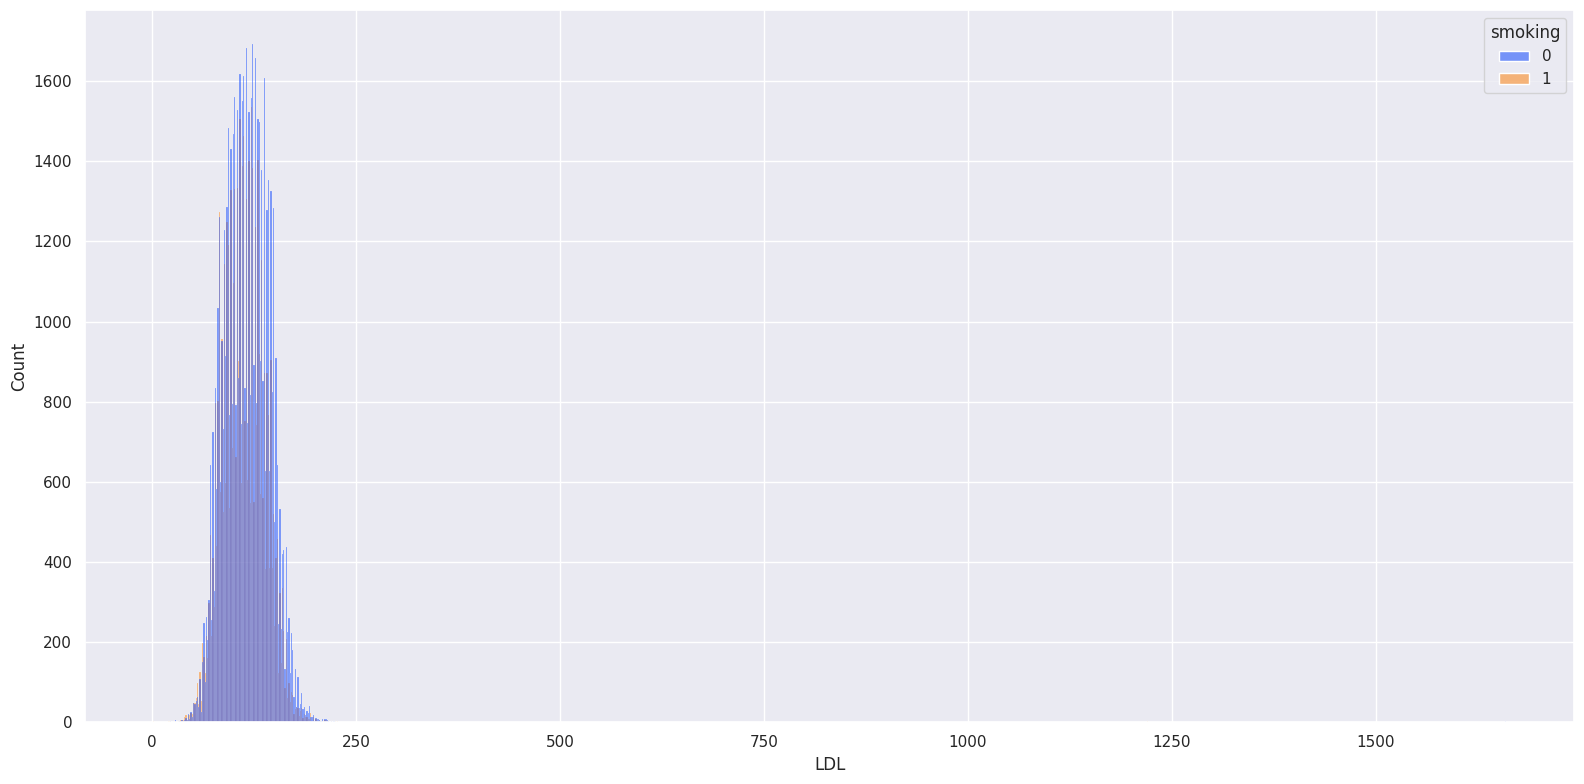

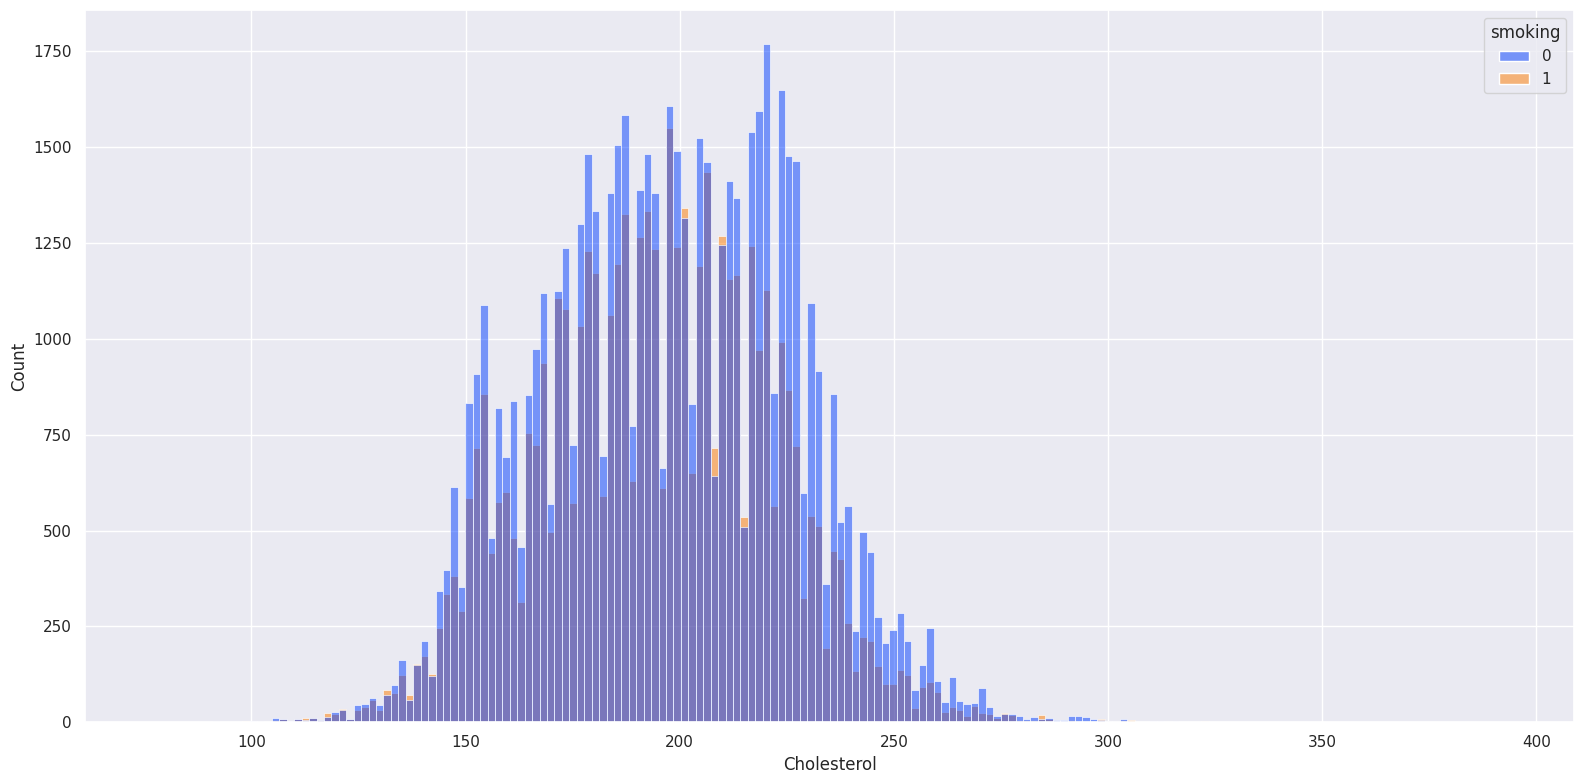

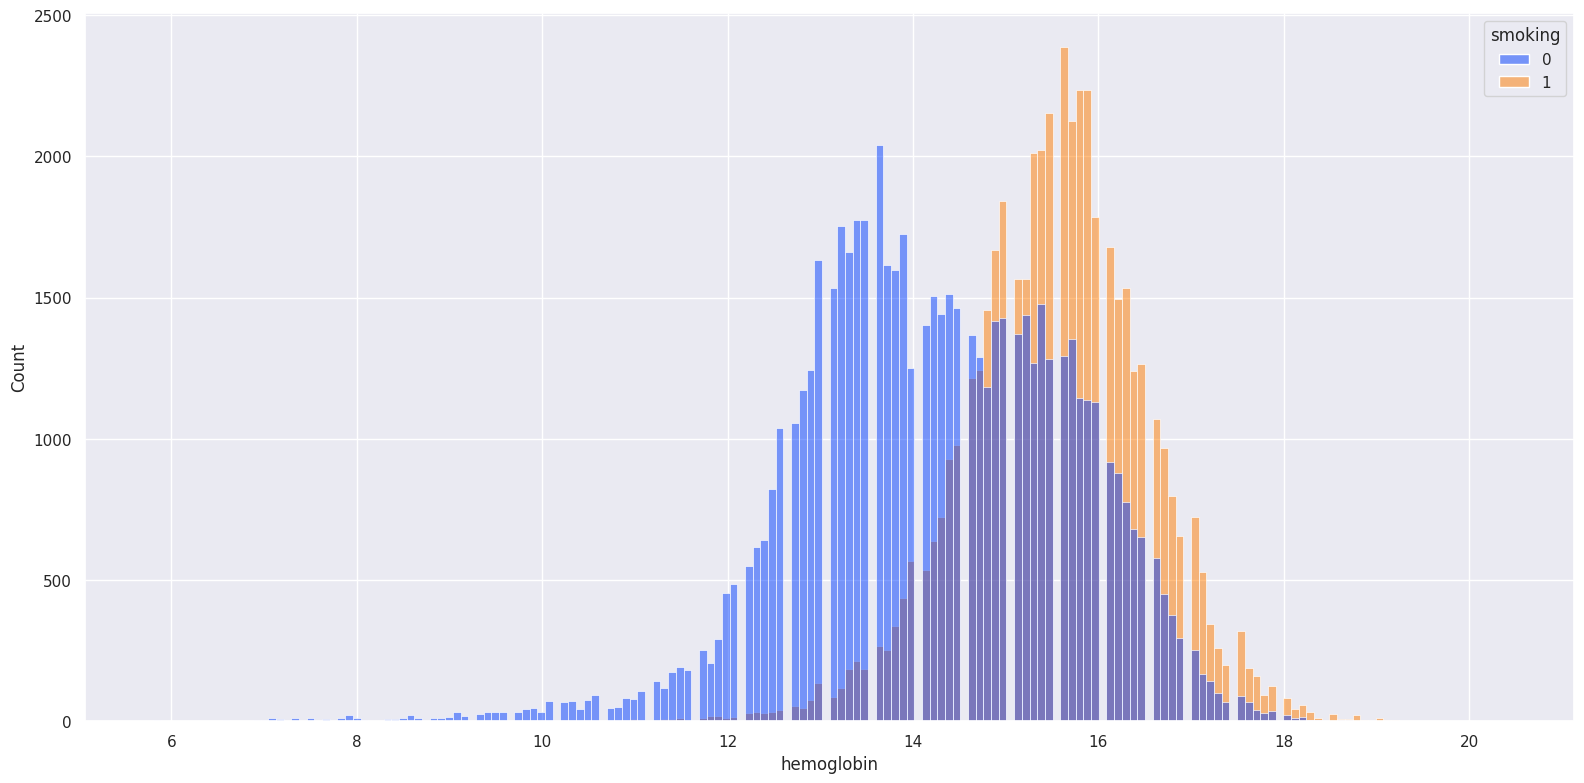

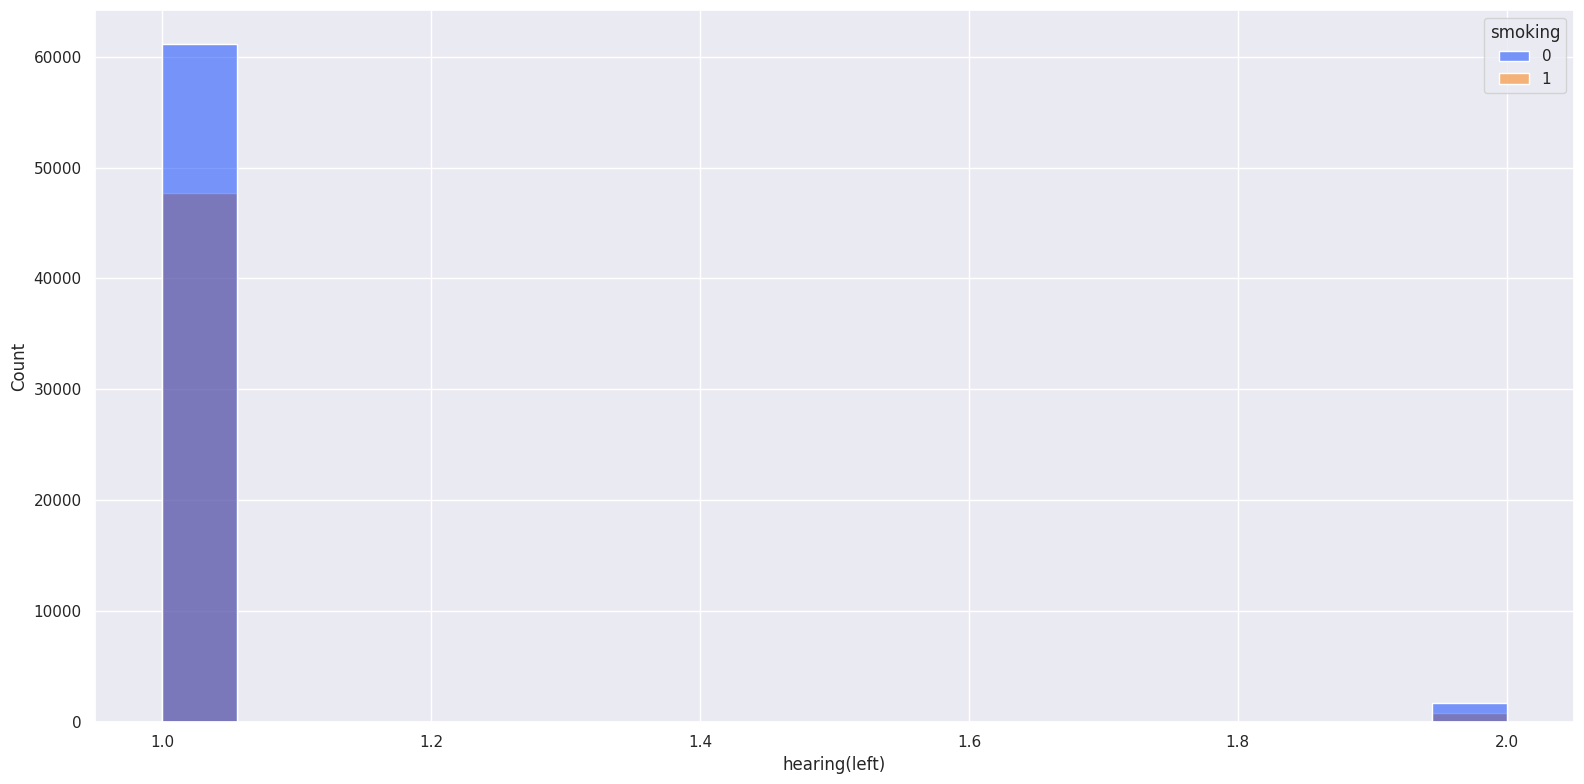

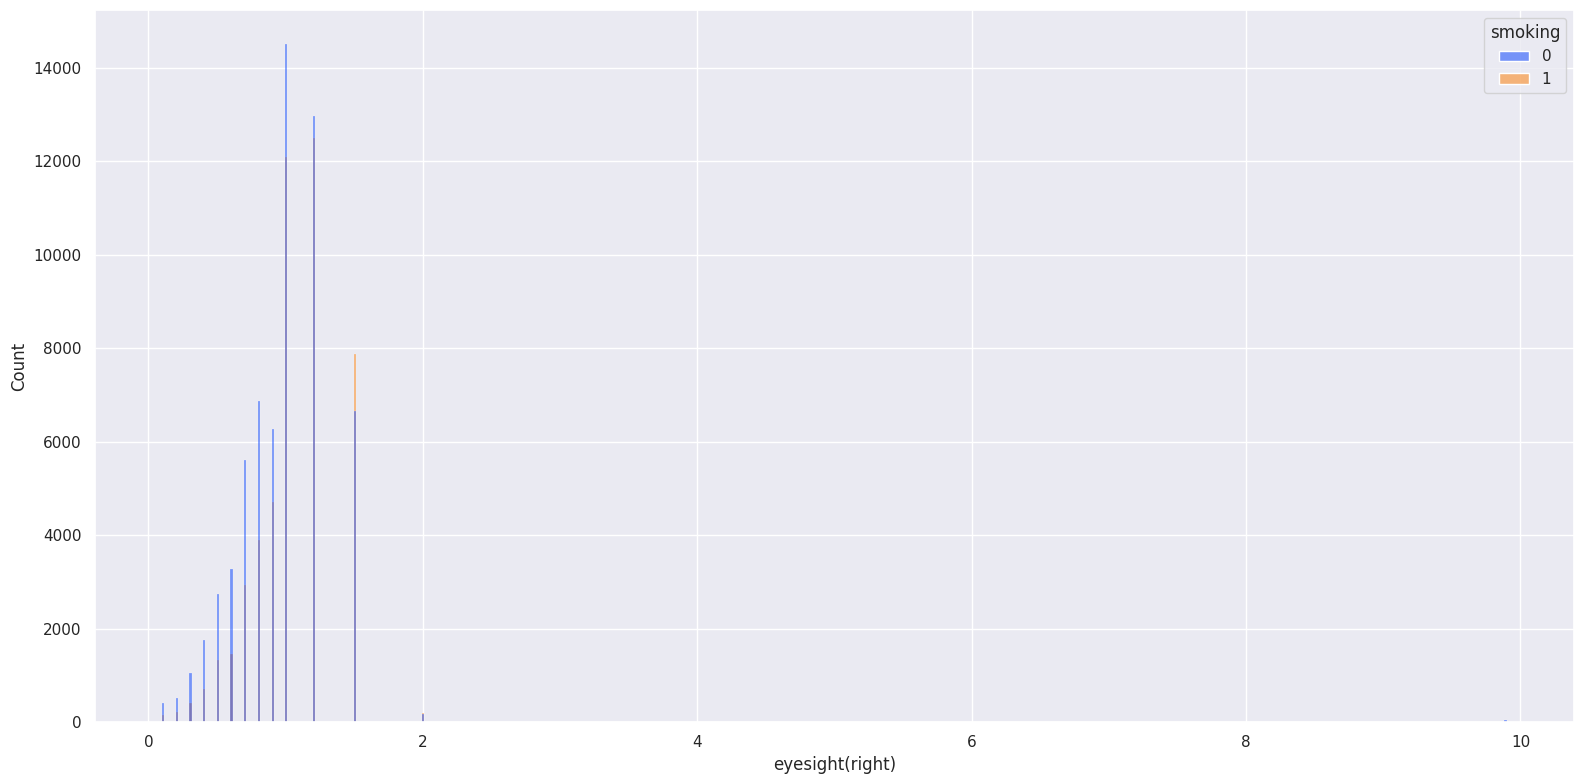

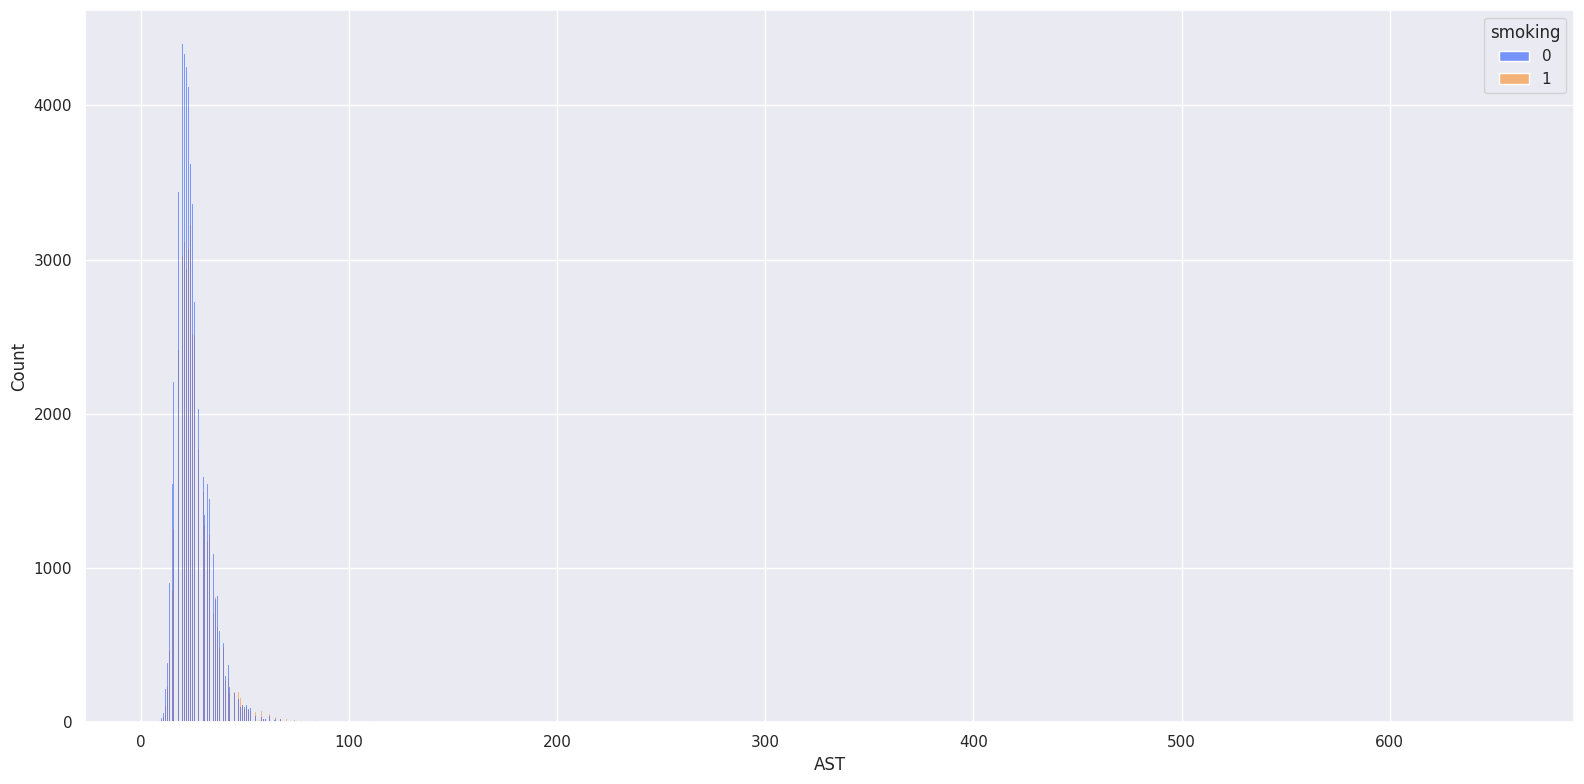

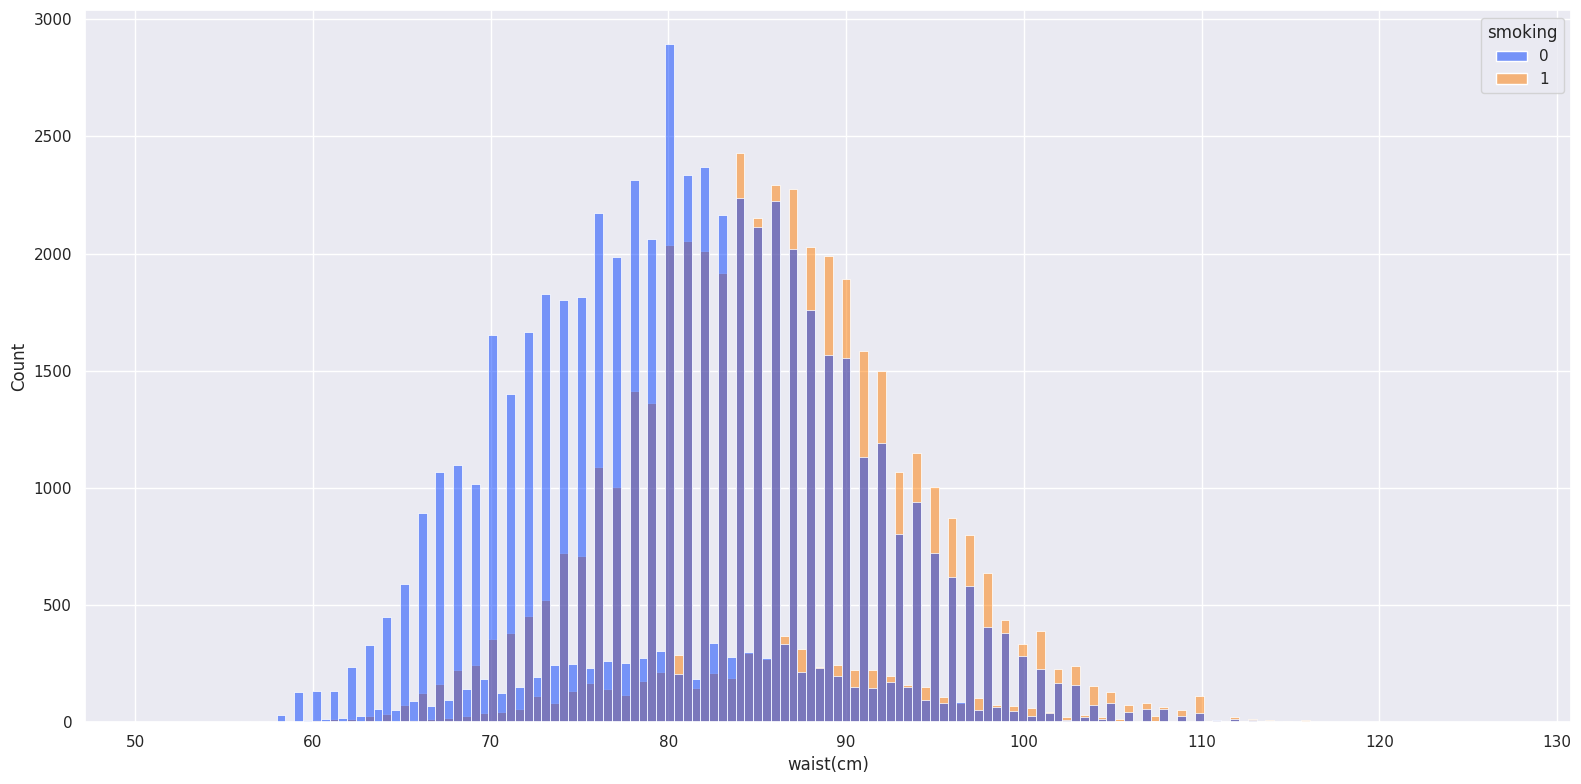

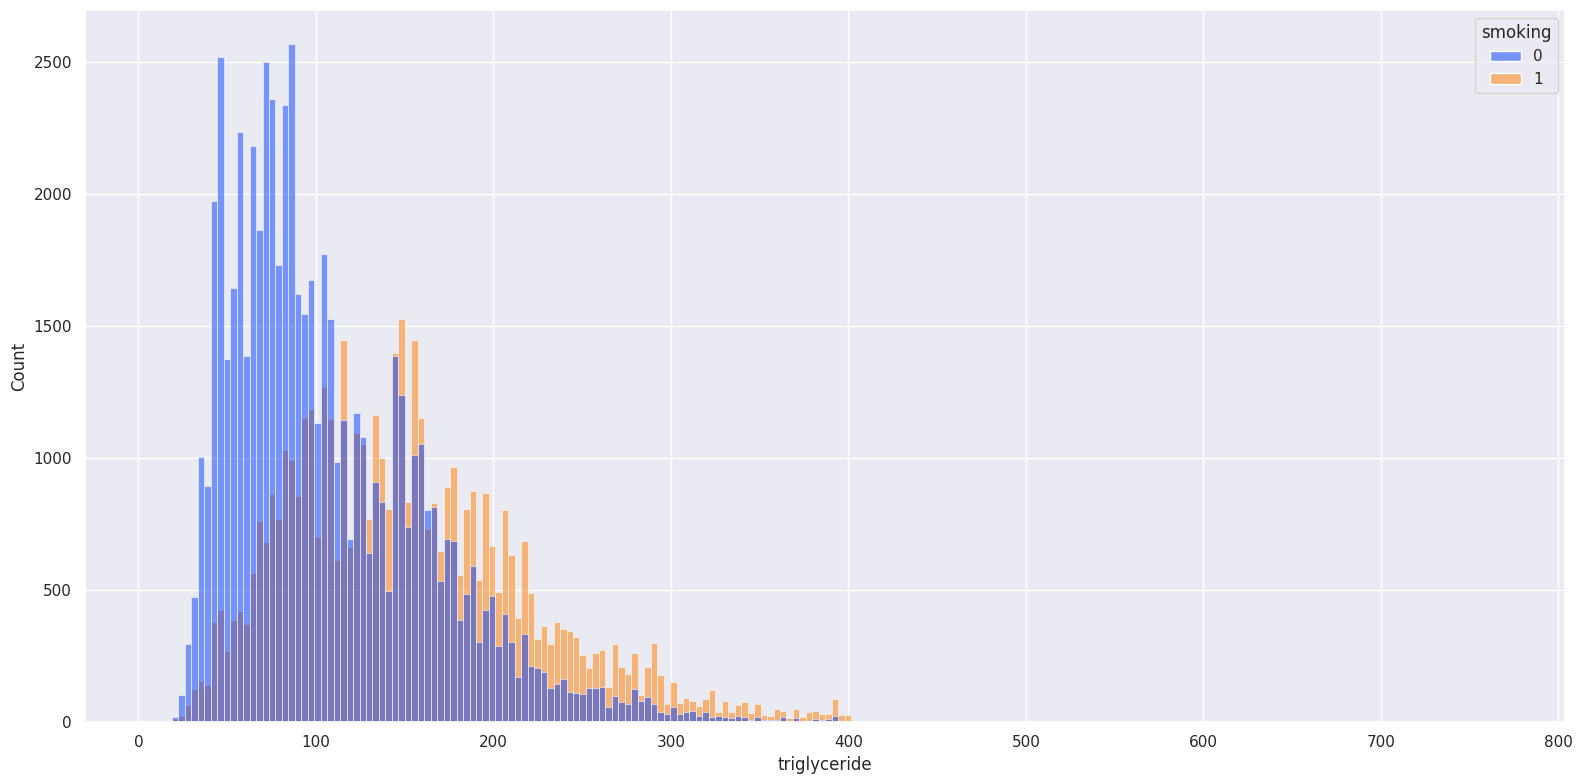

In [83]:
for f in features:
    plt.figure(figsize = (16, 8))
    sns.histplot(data = train_data, x = f, hue = 'smoking', palette = 'bright')
    plt.tight_layout()
    plt.show

This is a distribution of smoking on features
this shows what features are more likely to help in the classifications

AST and LDL features are not very clear as they has a very high range with outliers so i am limiting it and replotting it

In [84]:
filtered_data = train_data[(train_data['AST'] >= 0) & (train_data['AST'] <= 120)]
filtered_data

weight(kg)  HDL  LDL  Cholesterol  hemoglobin  hearing(left)  \
17406           70   41   93          172        14.7              1   
61303           60   77  116          205        14.7              1   
71781           50   62   95          186        13.3              1   
67014           55   61   95          167        12.9              1   
73322           55   46  104          171        14.0              2   
...            ...  ...  ...          ...         ...            ...   
119879          80   42  143          225        15.3              1   
103694          65   48   90          169        15.9              1   
131932          60   74   74          166        13.8              1   
146867          85   42  116          175        15.0              1   
121958          85   51  209          295        15.2              1   

        eyesight(right)  AST  waist(cm)  triglyceride  smoking  
17406               0.8   24       83.2           190        1  
61303               1.2   34       76.0            59        1  
71781               0.7   17       64.0           145        1  
67014               1.0   38       76.0            59        0  
73322               1.0   25       75.0           110        0  
...                 ...  ...        ...           ...      ...  
119879              1.2   41       88.0           204        1  
103694              1.2   24       79.0           156        1  
131932              1.0   21       81.0            93        1  
146867              1.5   33       97.0            86        0  
121958              1.0   17       88.0           184        1  

[111441 rows x 11 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

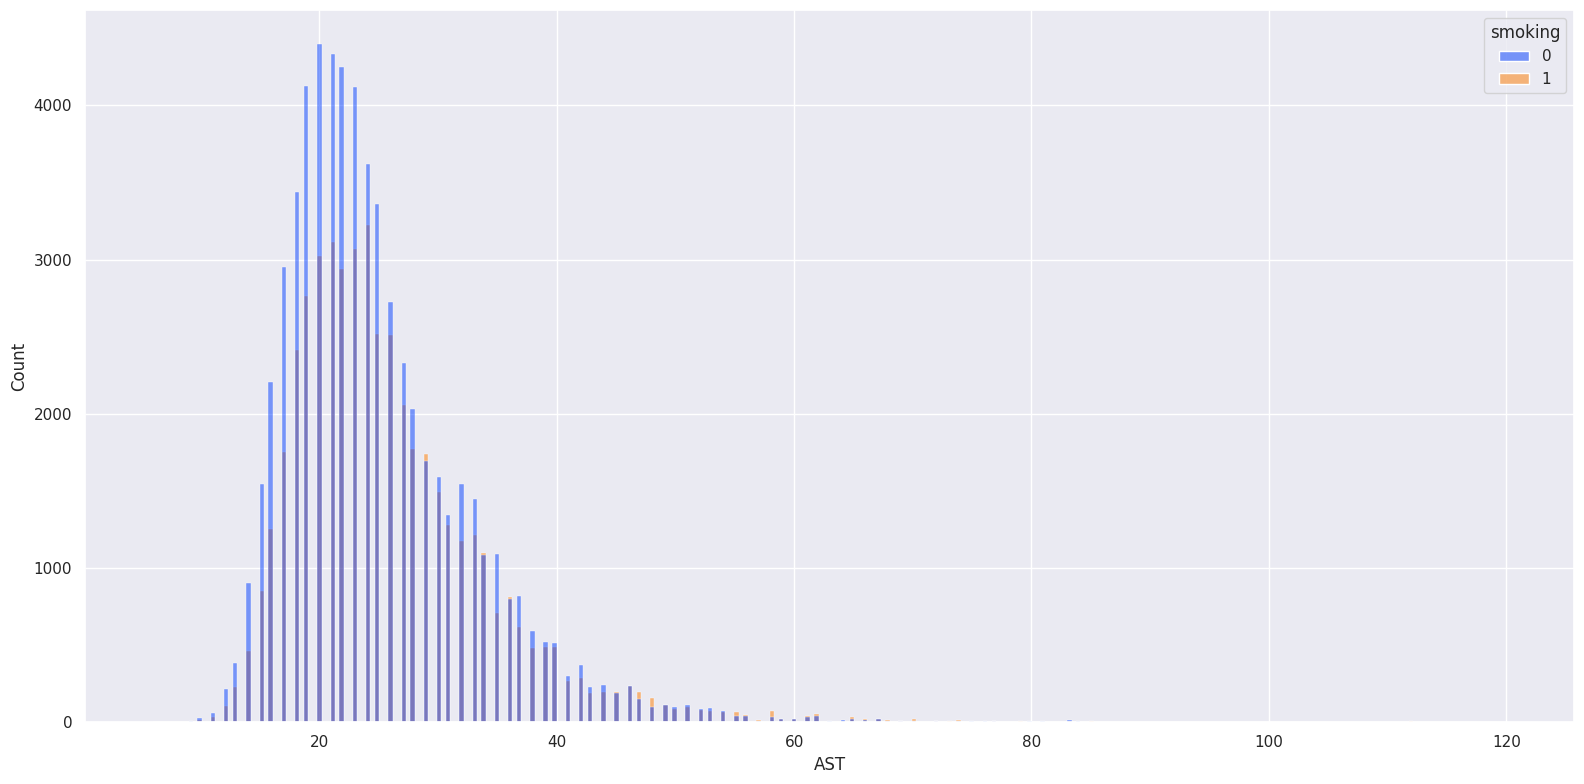

In [85]:
plt.figure(figsize = (16, 8))
sns.histplot(data = filtered_data, x = 'AST', hue = 'smoking', palette = 'bright')
plt.tight_layout()
plt.show

In [86]:
filtered_data = train_data[(train_data['LDL'] >= 0) & (train_data['LDL'] <= 250)]
filtered_data

weight(kg)  HDL  LDL  Cholesterol  hemoglobin  hearing(left)  \
17406           70   41   93          172        14.7              1   
61303           60   77  116          205        14.7              1   
71781           50   62   95          186        13.3              1   
67014           55   61   95          167        12.9              1   
73322           55   46  104          171        14.0              2   
...            ...  ...  ...          ...         ...            ...   
119879          80   42  143          225        15.3              1   
103694          65   48   90          169        15.9              1   
131932          60   74   74          166        13.8              1   
146867          85   42  116          175        15.0              1   
121958          85   51  209          295        15.2              1   

        eyesight(right)  AST  waist(cm)  triglyceride  smoking  
17406               0.8   24       83.2           190        1  
61303               1.2   34       76.0            59        1  
71781               0.7   17       64.0           145        1  
67014               1.0   38       76.0            59        0  
73322               1.0   25       75.0           110        0  
...                 ...  ...        ...           ...      ...  
119879              1.2   41       88.0           204        1  
103694              1.2   24       79.0           156        1  
131932              1.0   21       81.0            93        1  
146867              1.5   33       97.0            86        0  
121958              1.0   17       88.0           184        1  

[111468 rows x 11 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

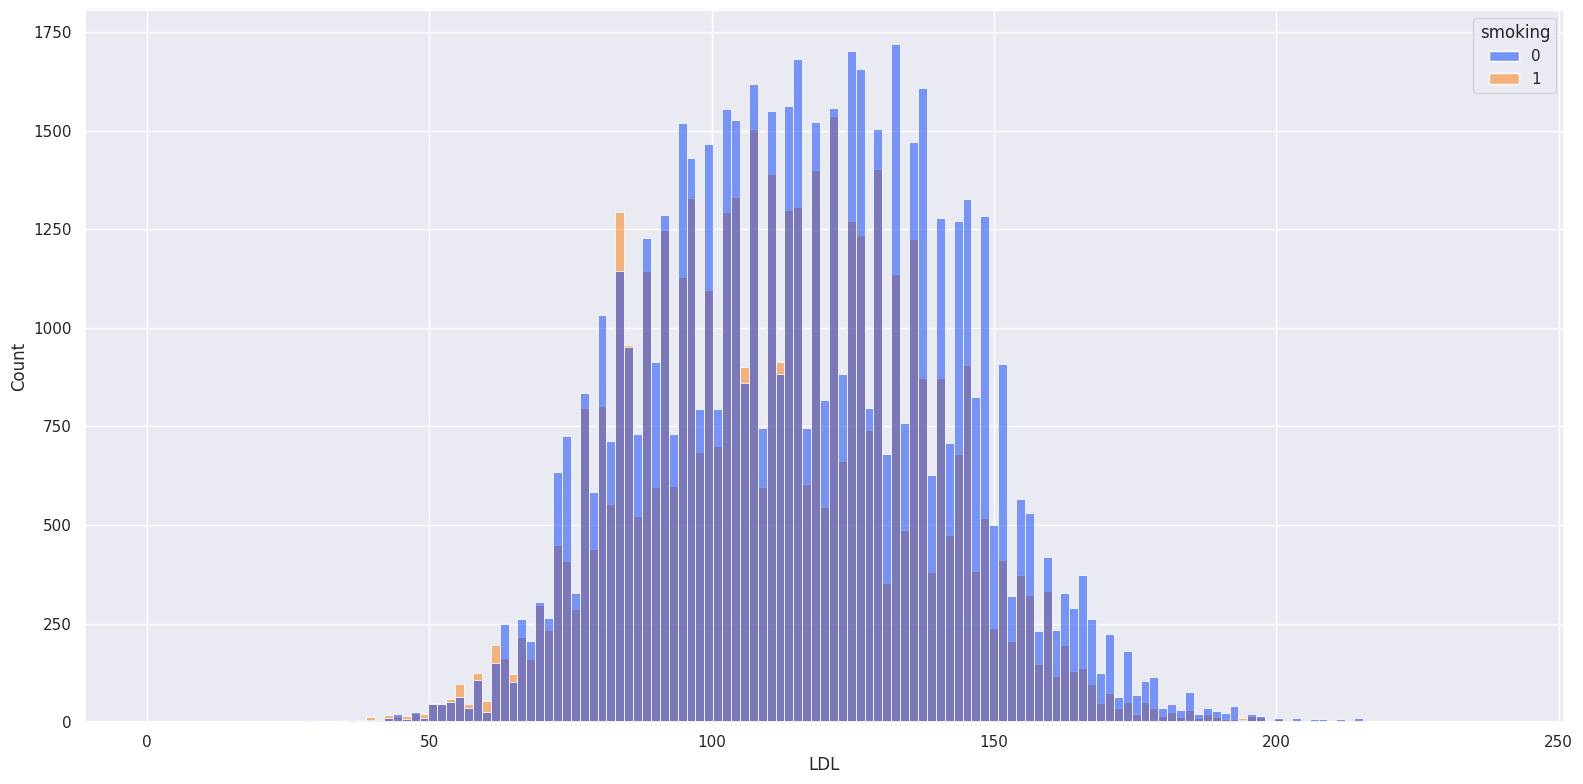

In [87]:
plt.figure(figsize = (16, 8))
sns.histplot(data = filtered_data, x = 'LDL', hue = 'smoking', palette = 'bright')
plt.tight_layout()
plt.show

In [88]:
train_duplicates_number = train_data[train_data.duplicated()]
                             
print(len(train_duplicates_number))


0


No duplicates 

### Bivariate Analysis


show the realtion of two features against each other
start by correlation heatmap

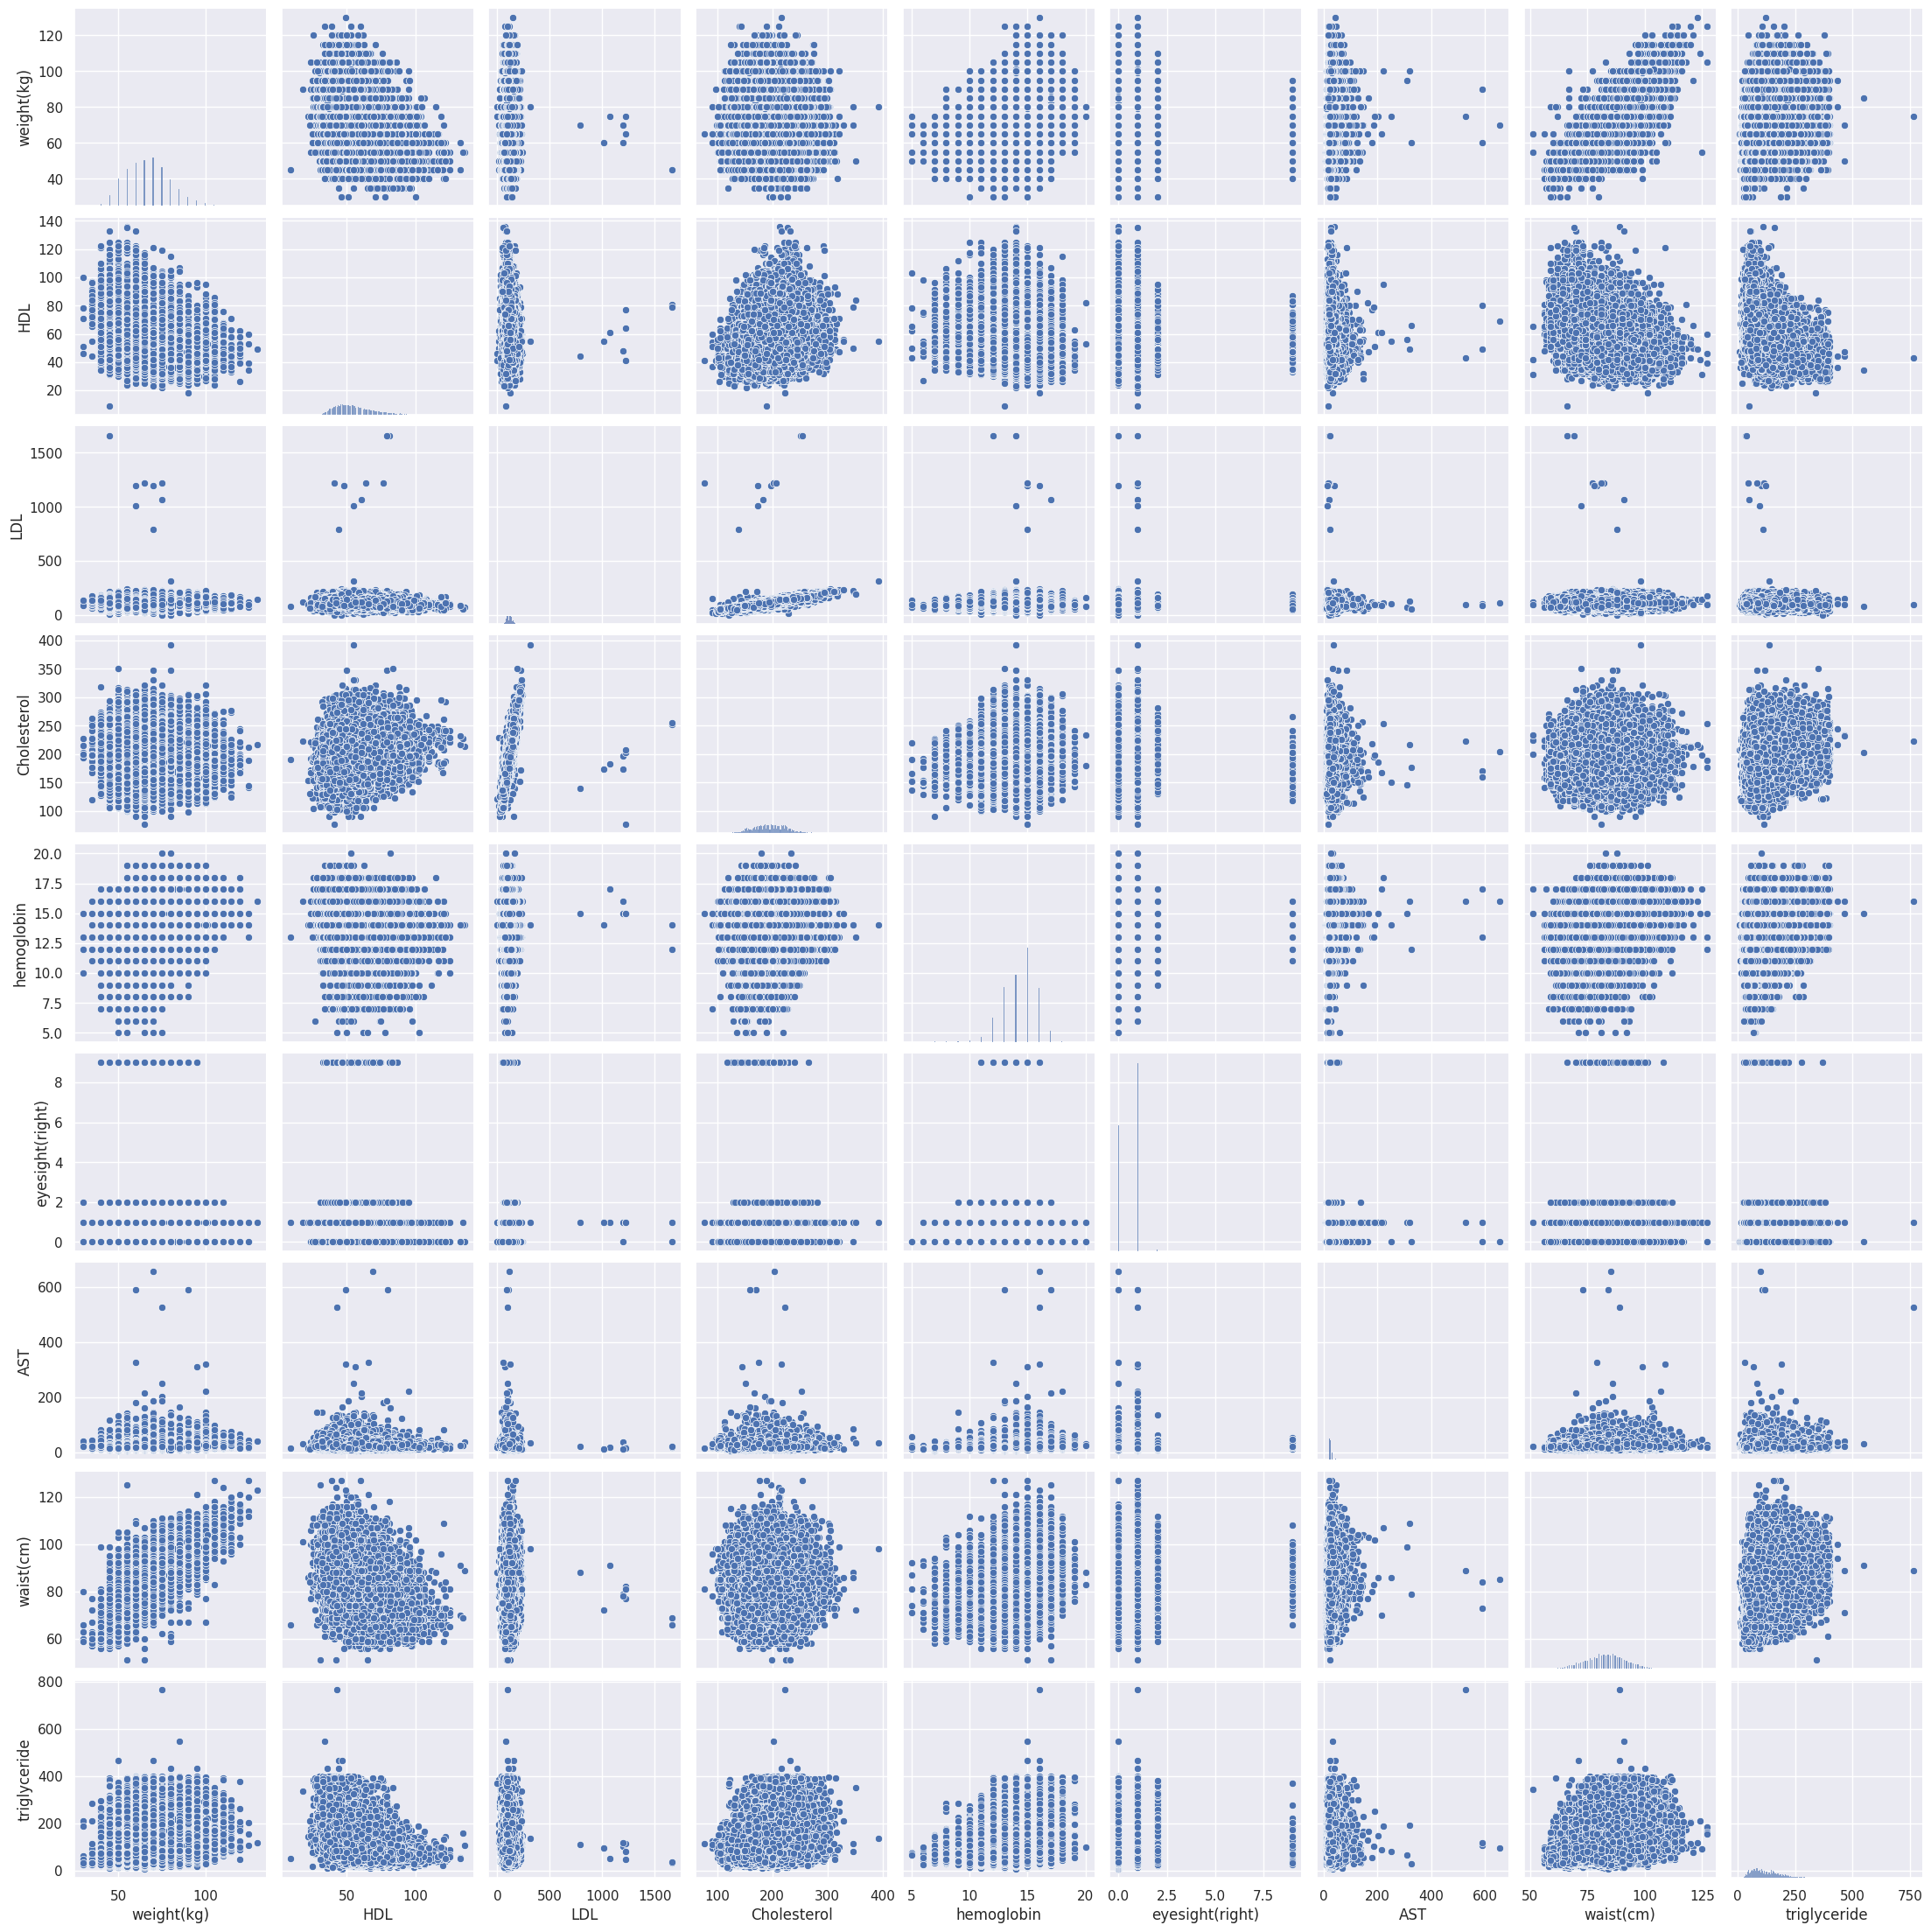

In [89]:
sns.pairplot(non_cat_data)

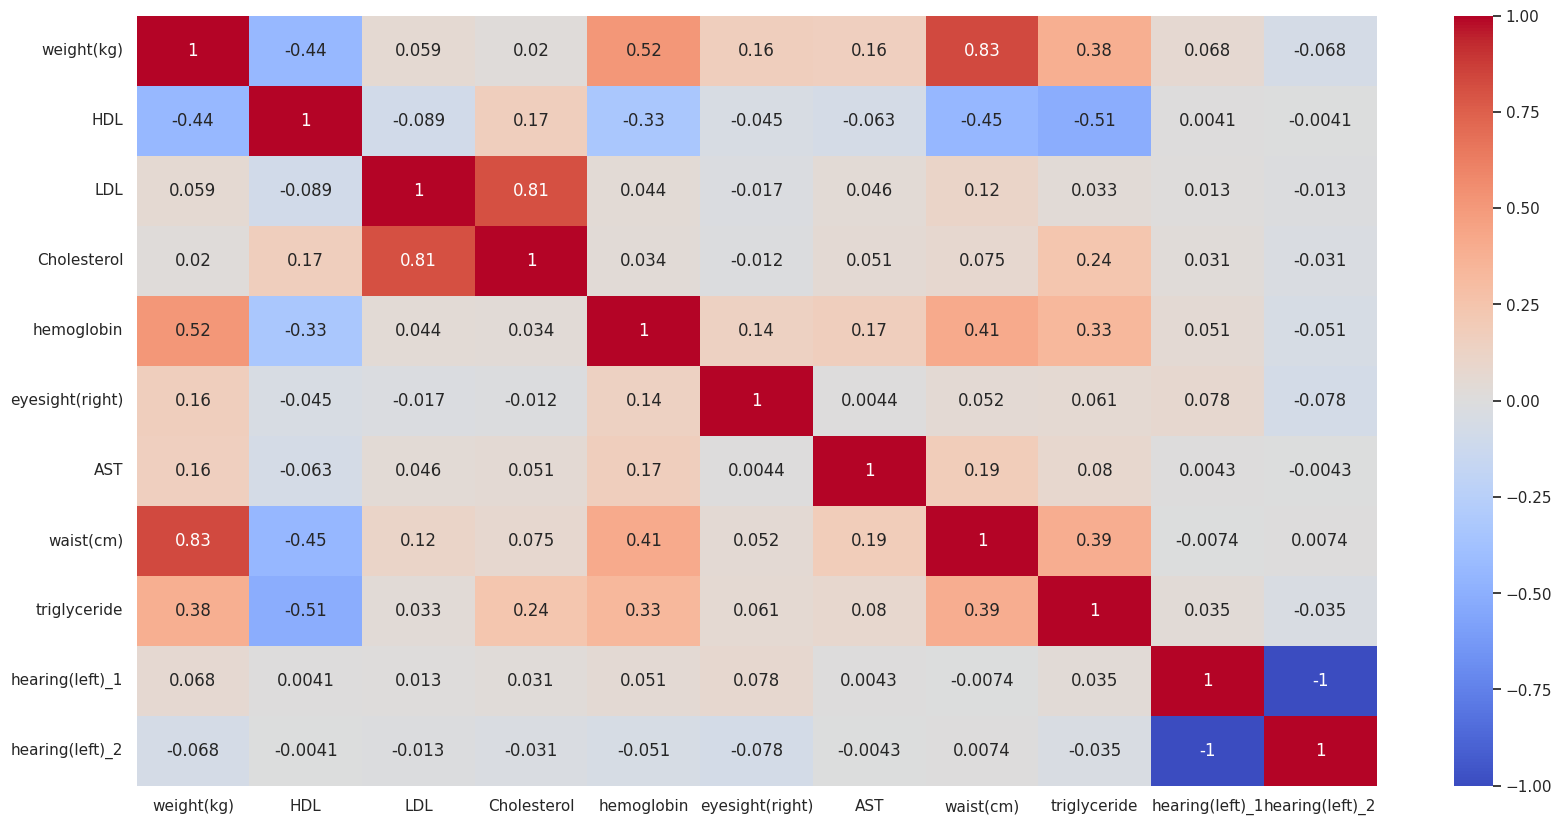

In [90]:
corr =x.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Seems like none of the features are duplicate of each others. Also, very few features are heavily correlated here.


LDL and cholestrol are strongly correlated

HDL and weight are inversely correlated

hemoglobin and weight are correlated

hemoglobin and HDL are inversely correlated

waist and weight are stronglt correlated

waist and HDL are inversely correlated

waist and hemoglobin are correlated

waist and AST are correlated

weight and triglyceride are correlated

HDL and triglyceride are inversely related

hemoglobin and triglyceride are correlated

waist and triglyceride are correlated

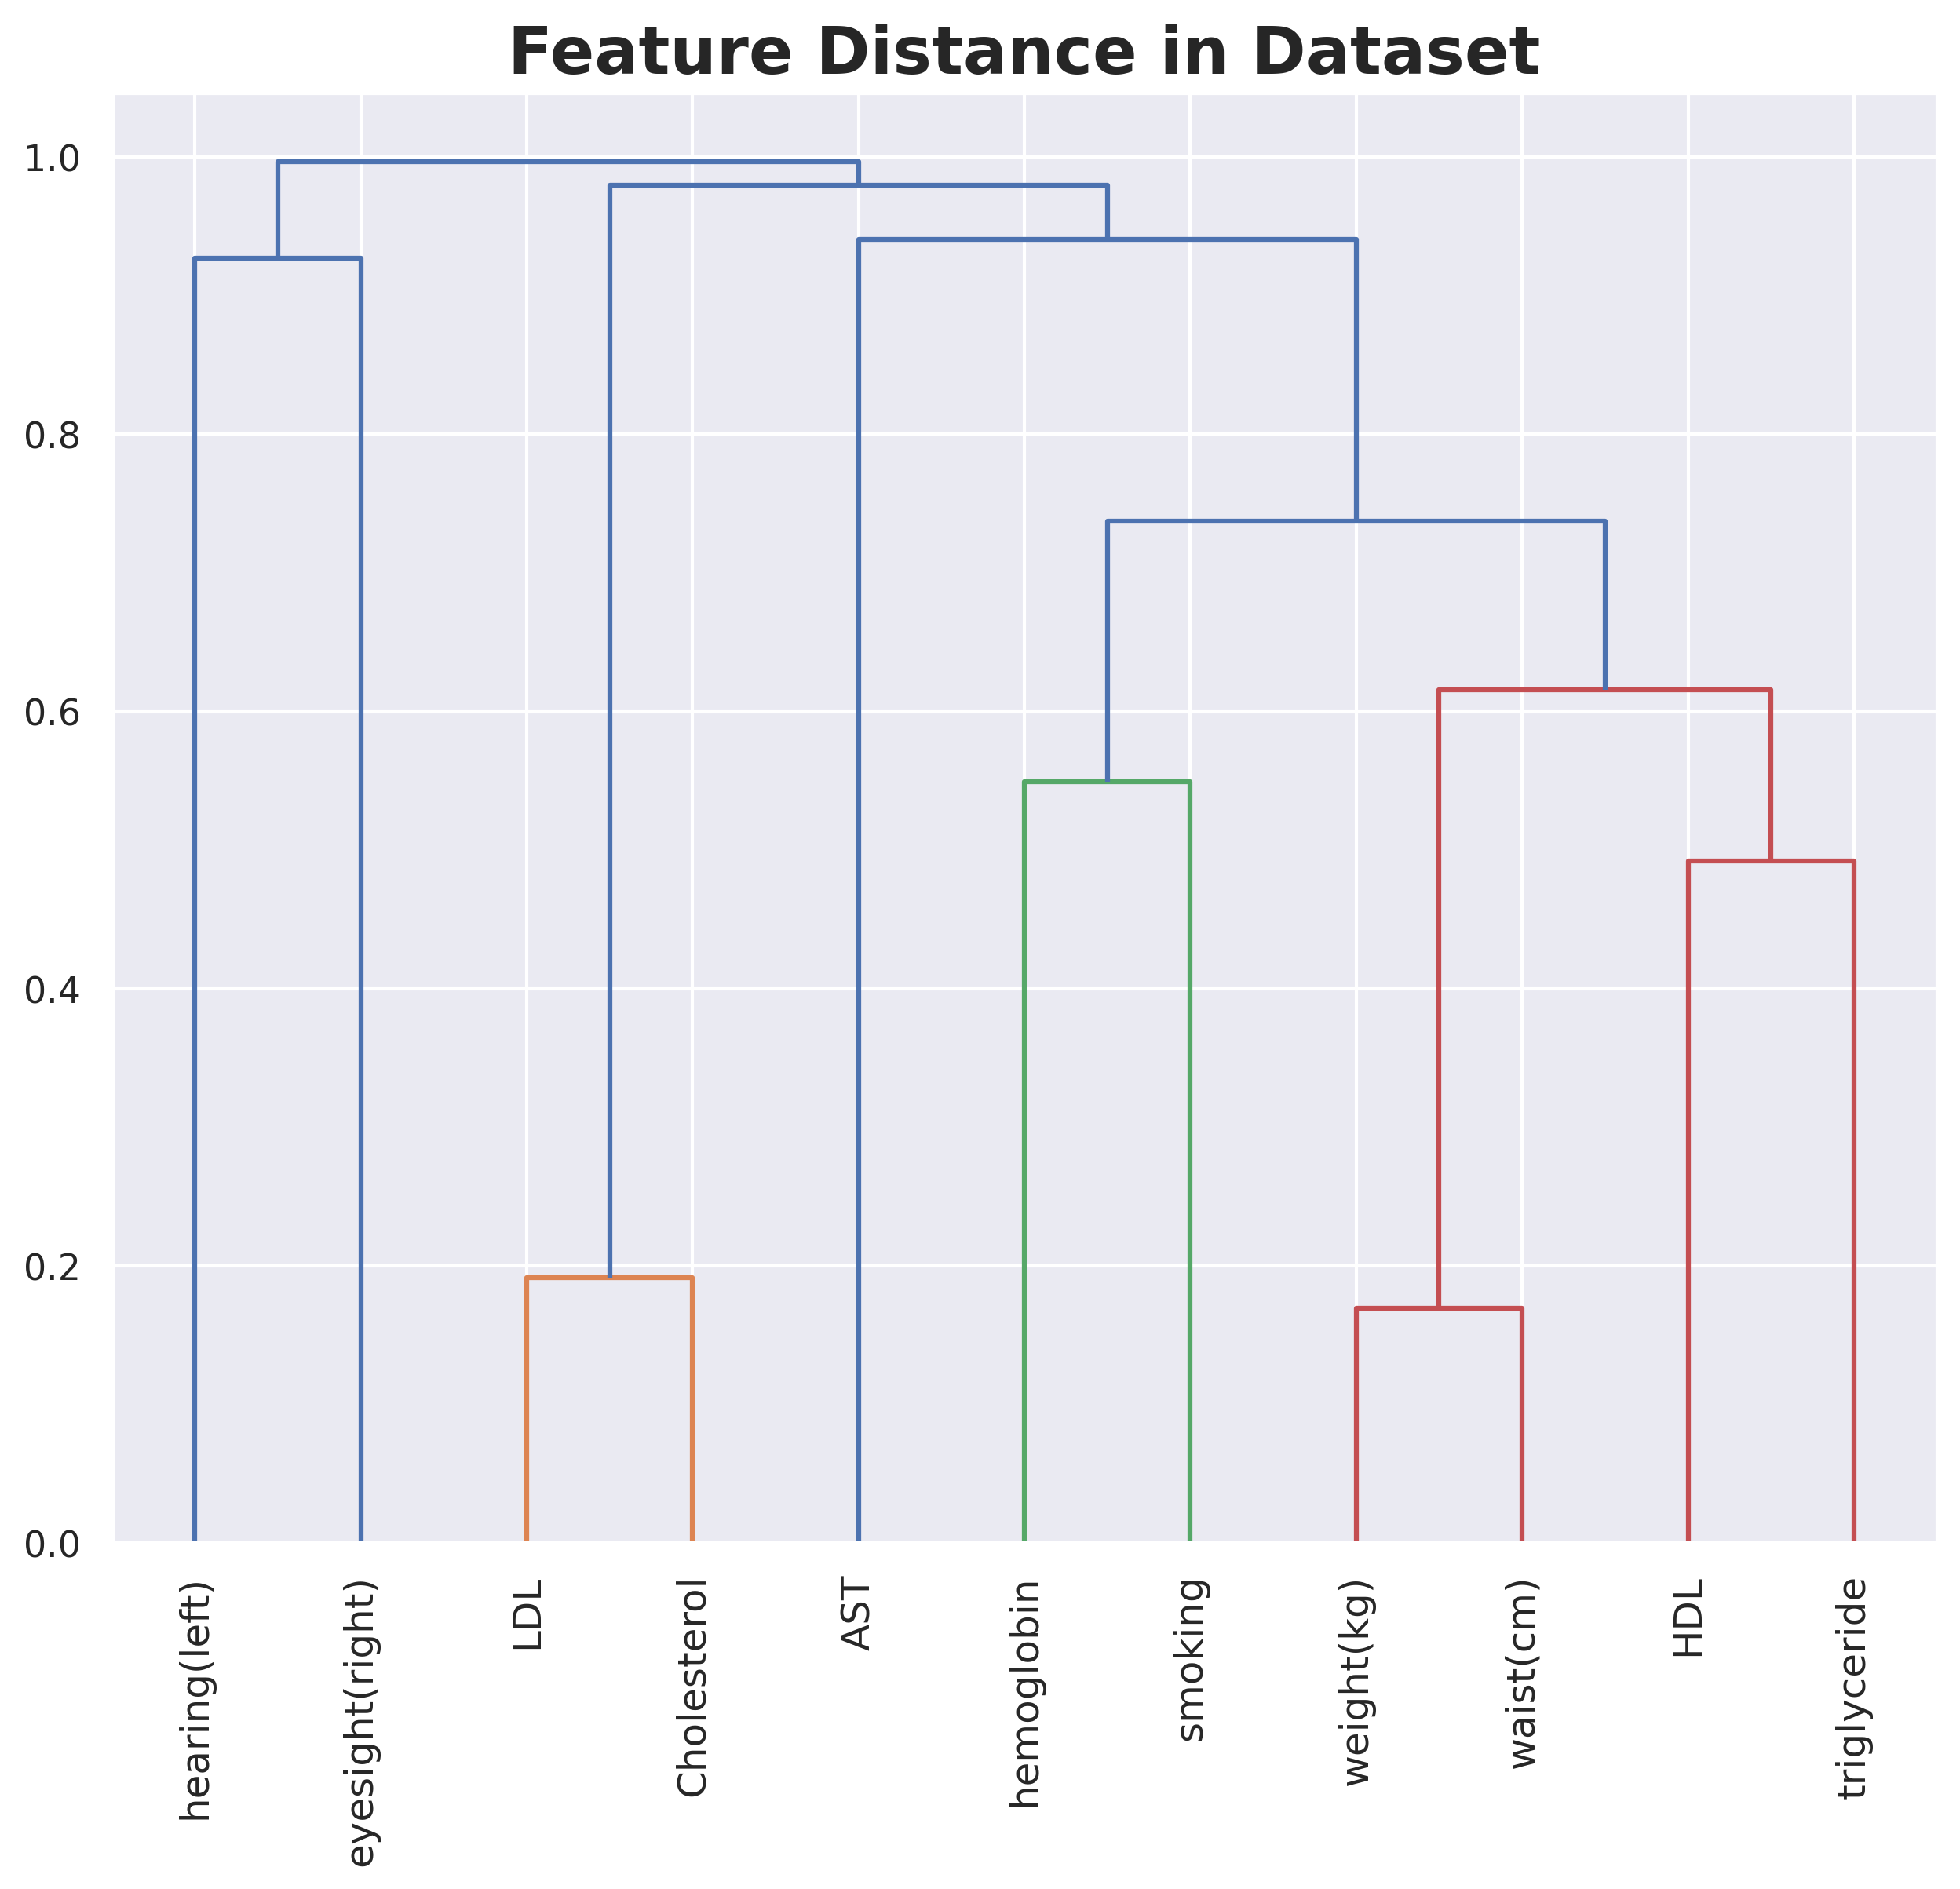

In [91]:
corr = data.corr(method = 'pearson')
dist_linkage = linkage(squareform(1 - abs(corr)), 'complete')
plt.figure(figsize = (10, 8), dpi = 300)
dendro = dendrogram(dist_linkage, labels=data.columns, leaf_rotation=90)
plt.title(f'Feature Distance in Dataset', weight = 'bold', size = 20)
plt.show()

Trying to introduce new features

In [92]:
x["HDL-LDL Ratio"] = x["HDL"] / x["LDL"]
x["HDL-triglyceride Ratio"] = x["HDL"] / x["triglyceride"]
x["LDL-triglyceride Ratio"] = x["LDL"] / x["triglyceride"]

In [93]:
features =['weight(kg)', 'HDL', 'LDL', 'Cholesterol', 'hemoglobin', 'hearing(left)', 'eyesight(right)', 'AST', 'waist(cm)', 'triglyceride'
           ,"HDL-LDL Ratio","HDL-triglyceride Ratio","LDL-triglyceride Ratio" ]

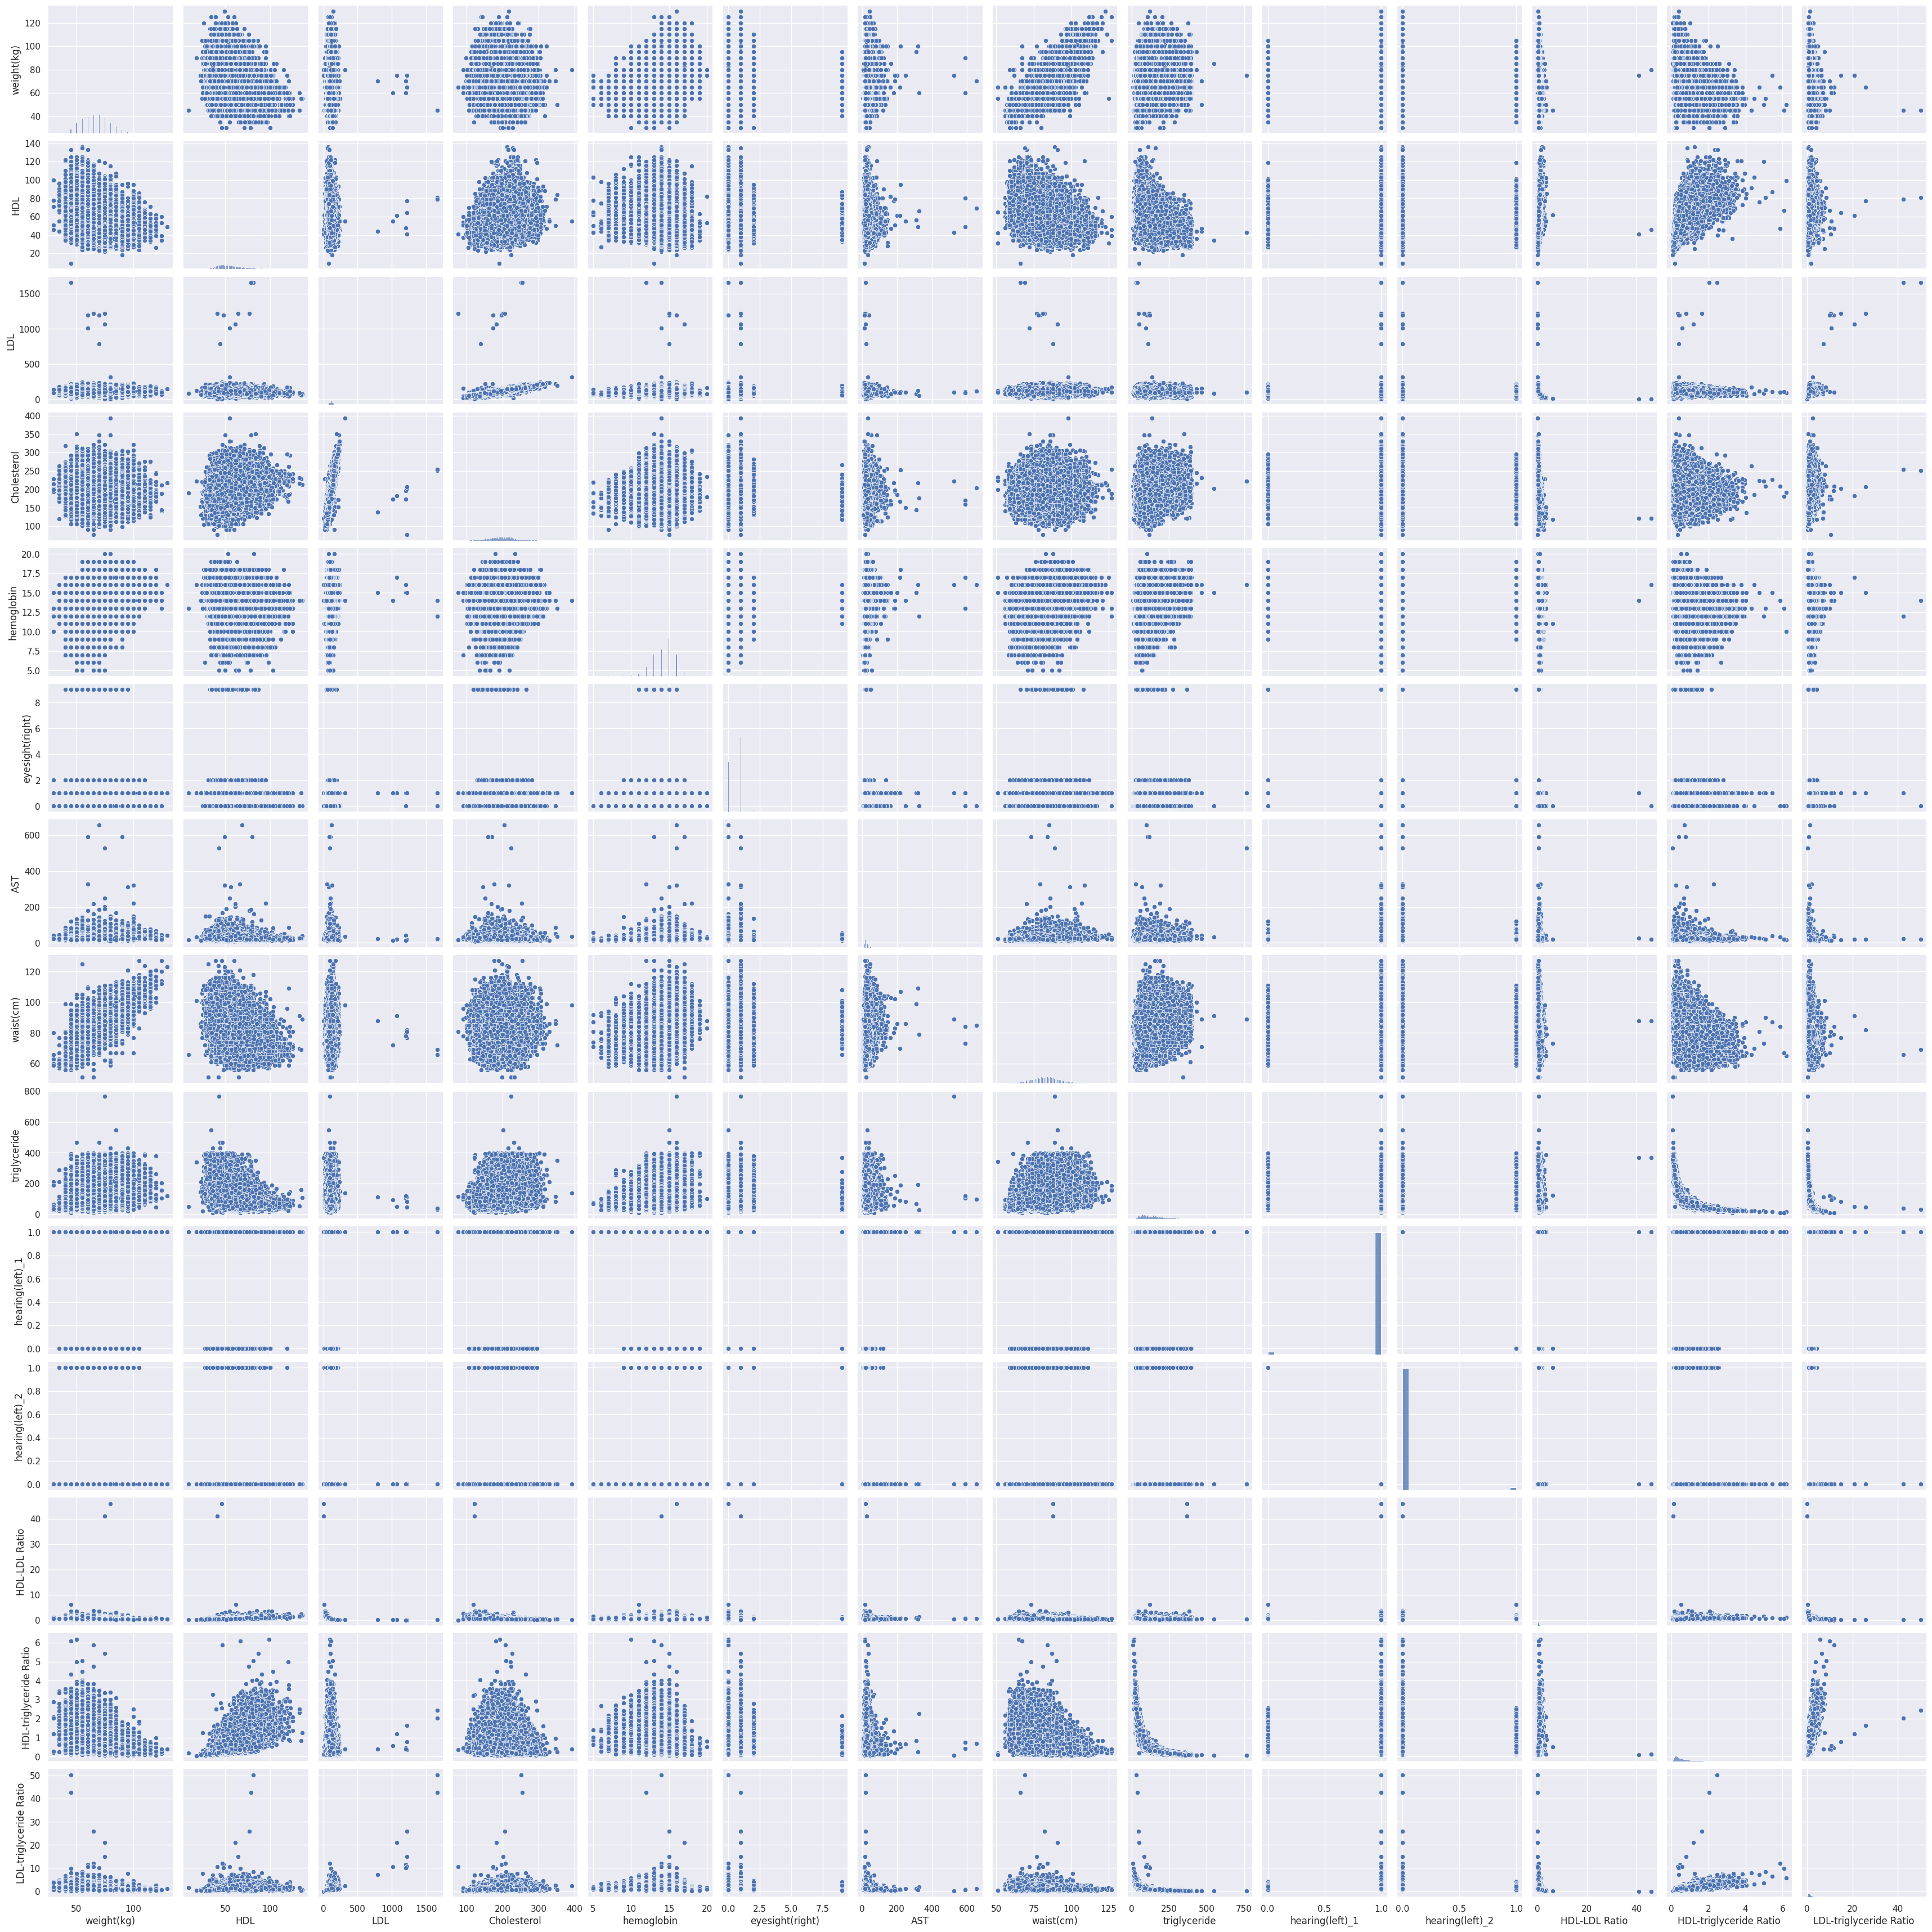

In [94]:
sns.pairplot(x)

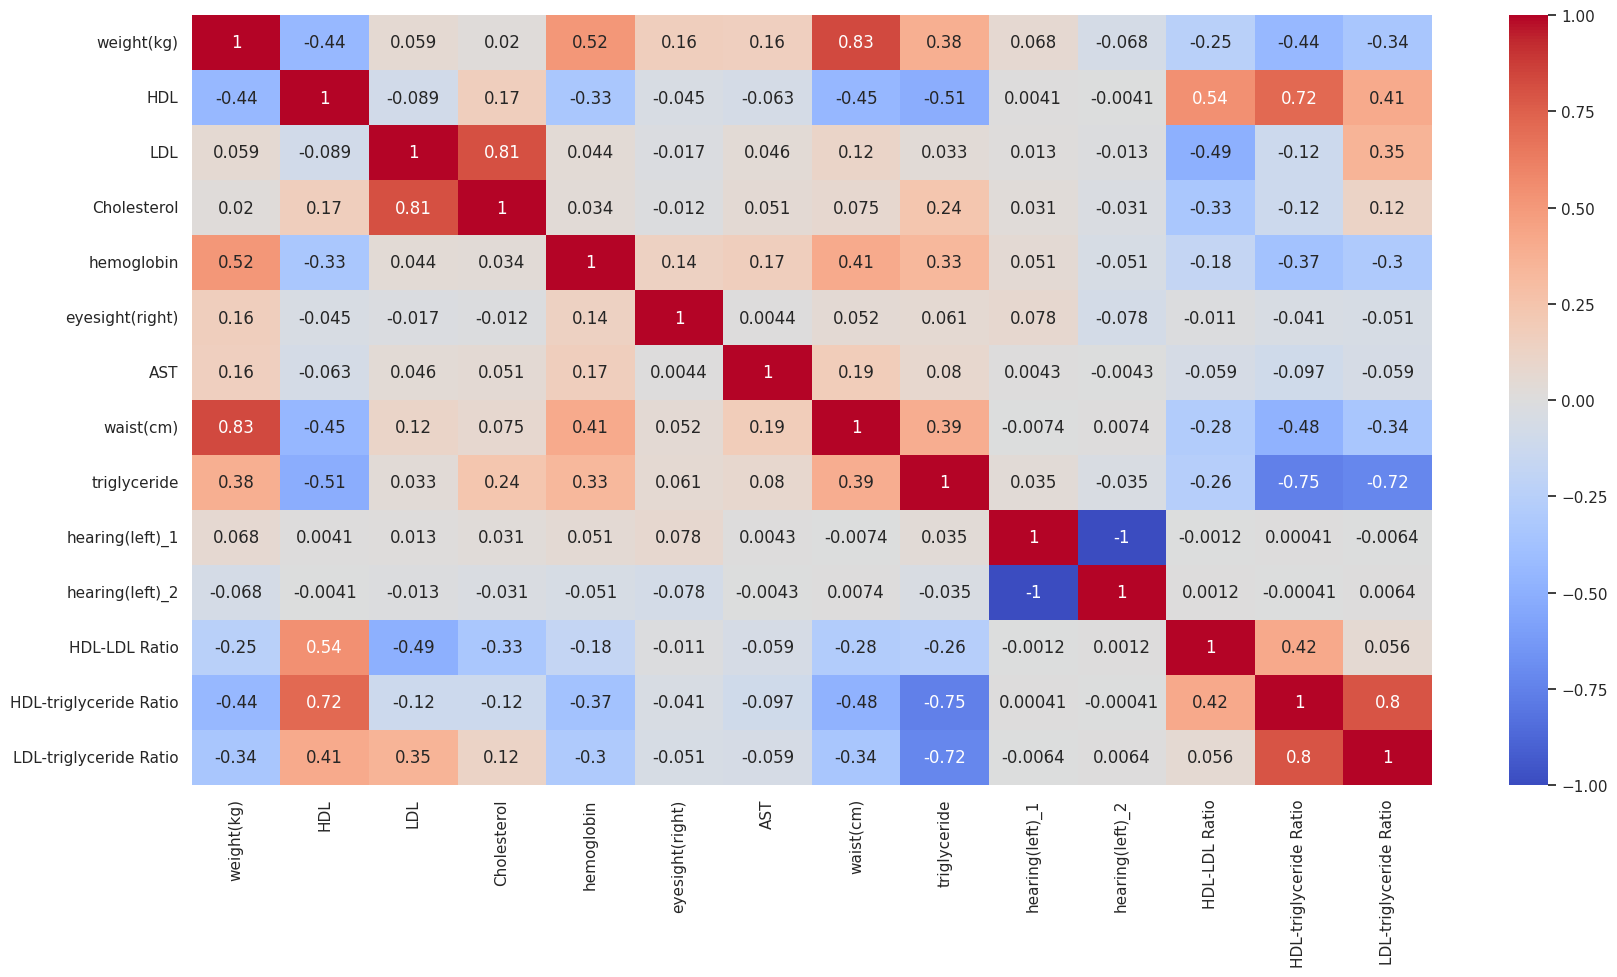

In [95]:
corr =x.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

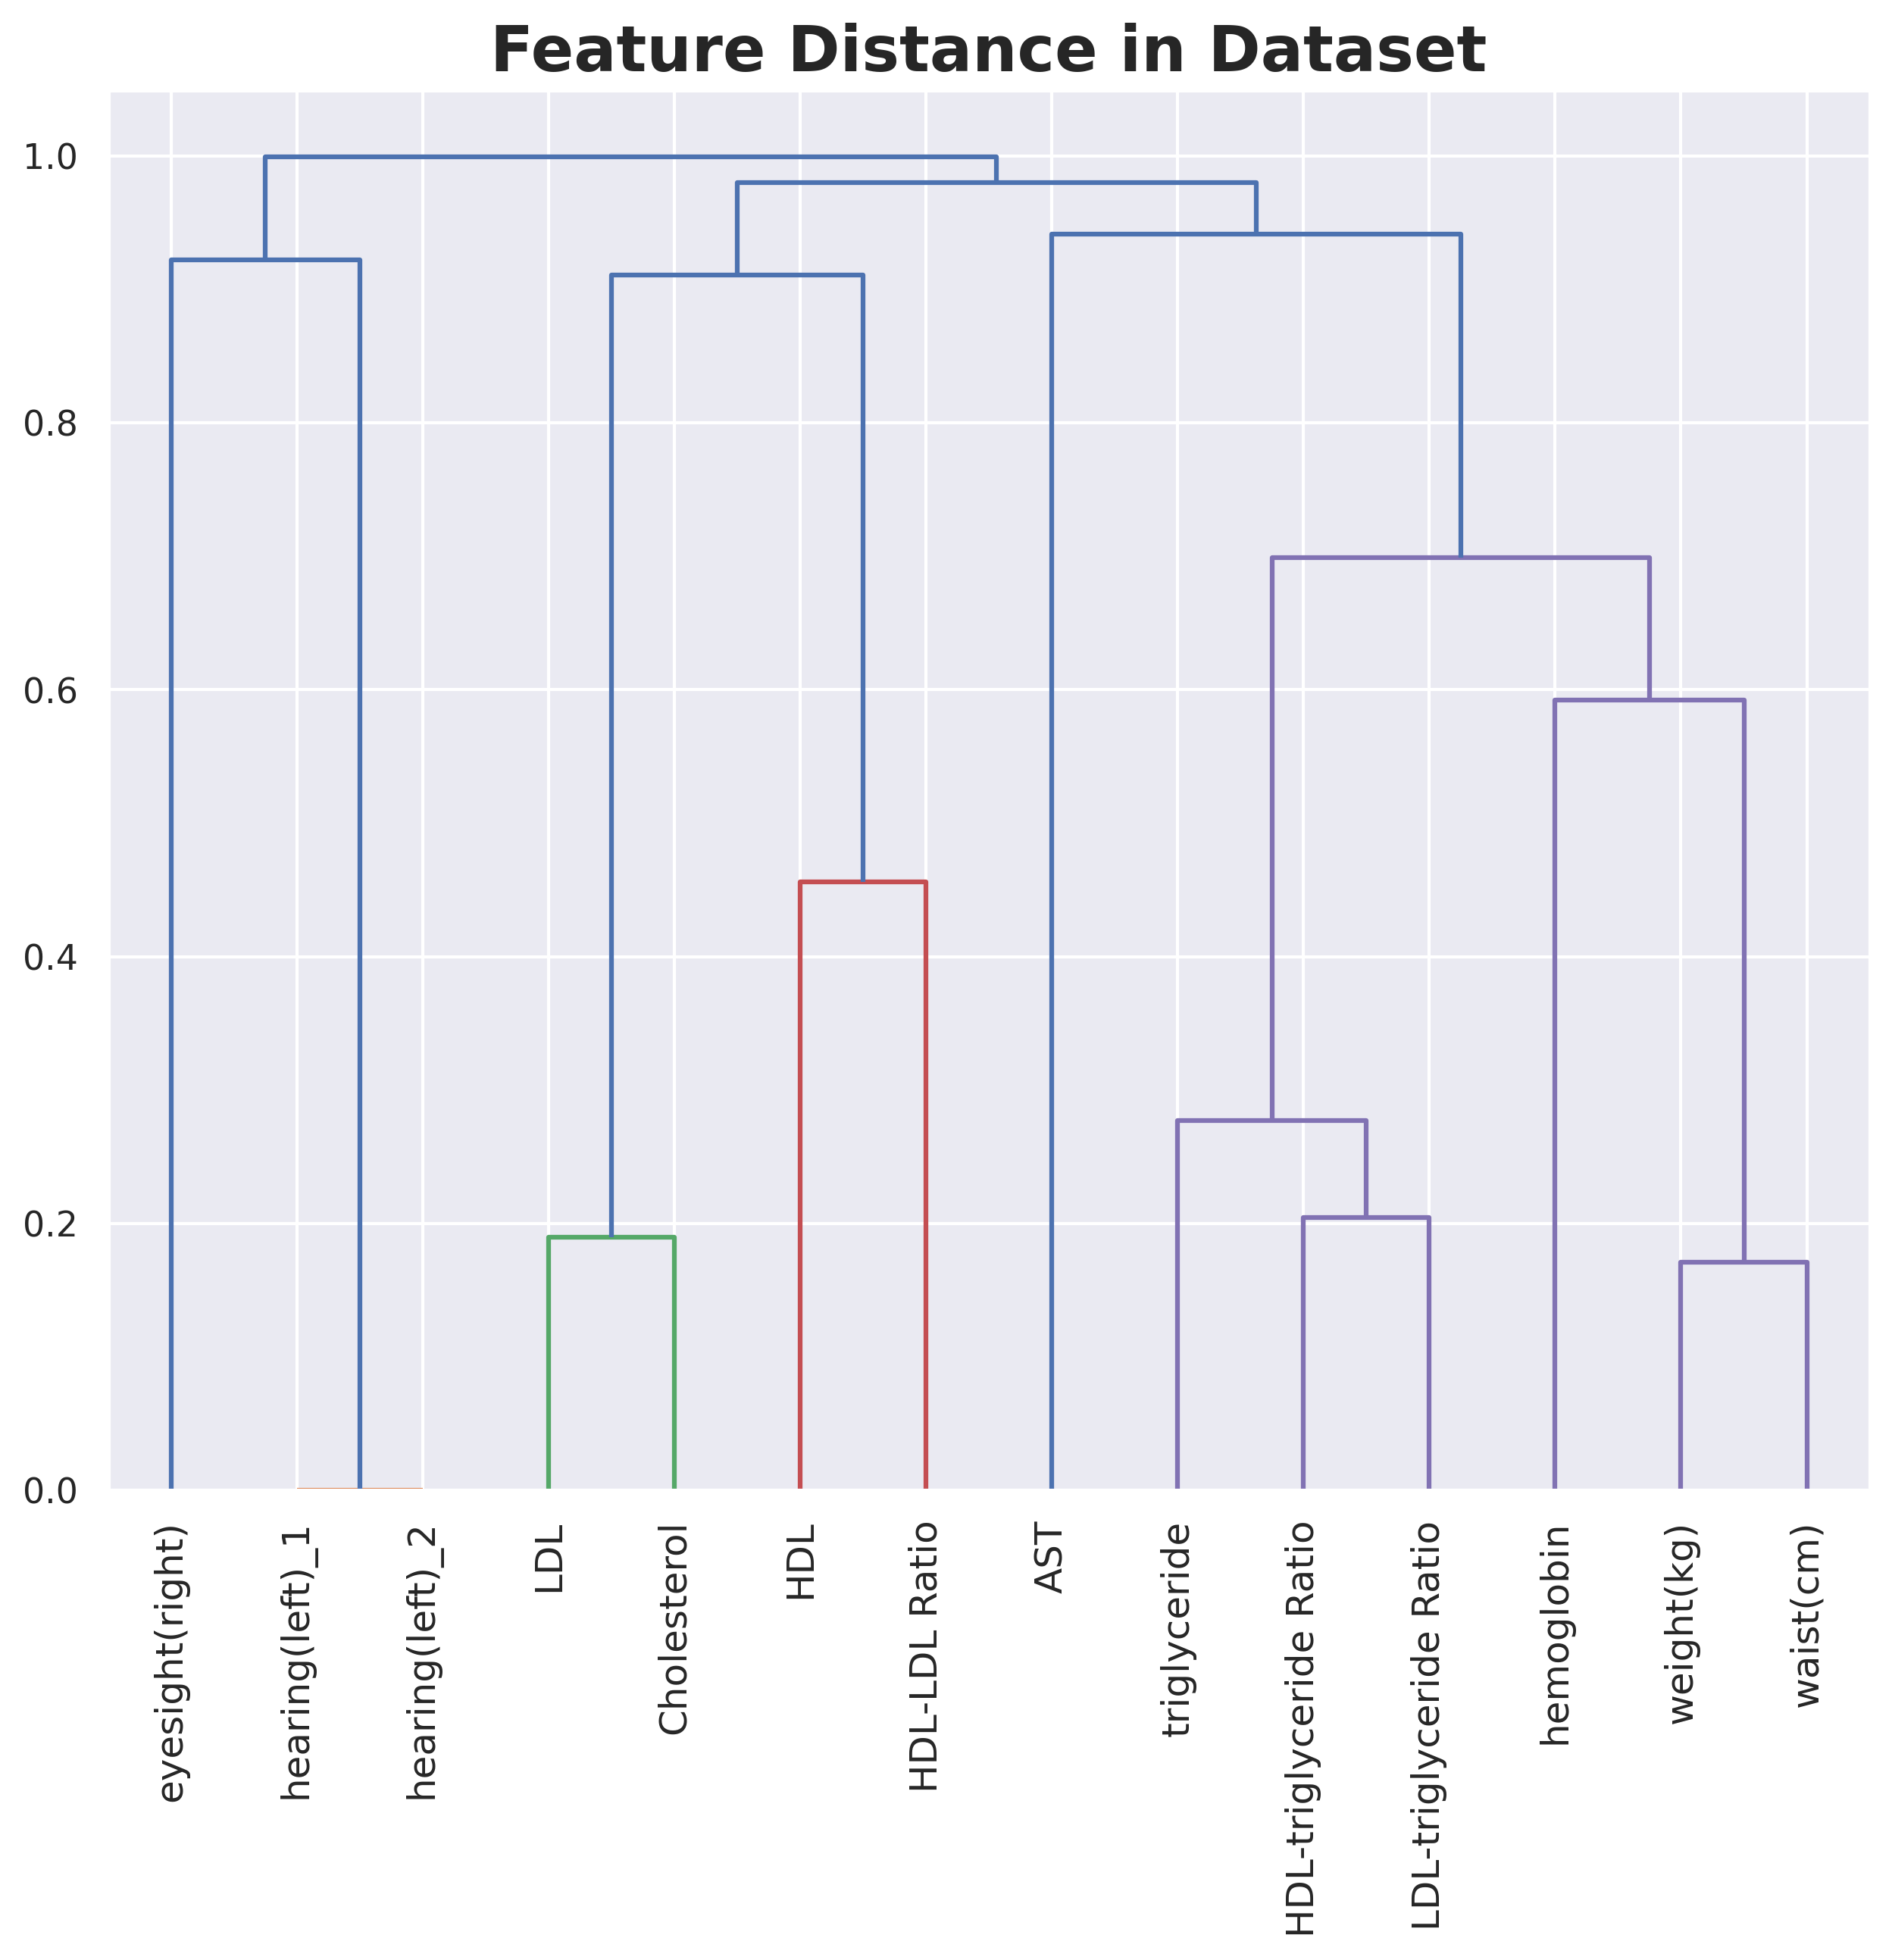

In [96]:
corr = x.corr(method = 'pearson')
dist_linkage = linkage(squareform(1 - abs(corr)), 'complete')
plt.figure(figsize = (10, 8), dpi = 300)
dendro = dendrogram(dist_linkage, labels=x.columns, leaf_rotation=90)
plt.title(f'Feature Distance in Dataset', weight = 'bold', size = 20)
plt.show()

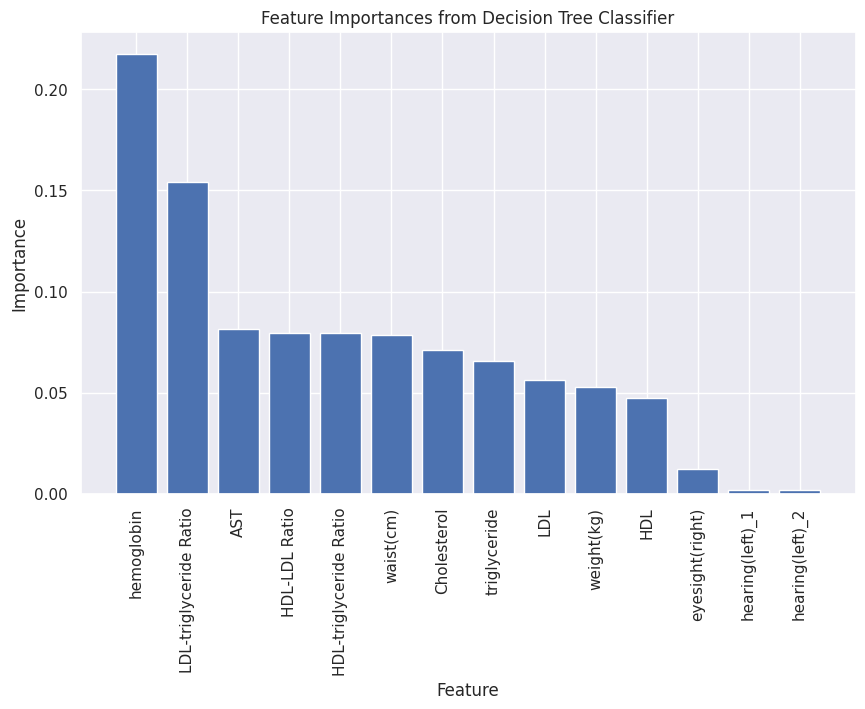

In [97]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x, target)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = x.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(x.shape[1]), sorted_feature_importances, align="center")
plt.xticks(range(x.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances from Decision Tree Classifier")
plt.show()

New features are more important 
hearing feature can be dropped

In [ ]:
non_cat_data = x.drop("hearing(left)_1",axis=1)
non_cat_data = non_cat_data.drop("hearing(left)_2",axis=1)
non_cat_data = pd.concat([non_cat_data,target], axis = 1)

array([[<Axes: title={'center': 'weight(kg)'}>,
        <Axes: title={'center': 'HDL'}>, <Axes: title={'center': 'LDL'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'eyesight(right)'}>,
        <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'waist(cm)'}>],
       [<Axes: title={'center': 'triglyceride'}>,
        <Axes: title={'center': 'HDL-LDL Ratio'}>,
        <Axes: title={'center': 'HDL-triglyceride Ratio'}>,
        <Axes: title={'center': 'LDL-triglyceride Ratio'}>],
       [<Axes: title={'center': 'smoking'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

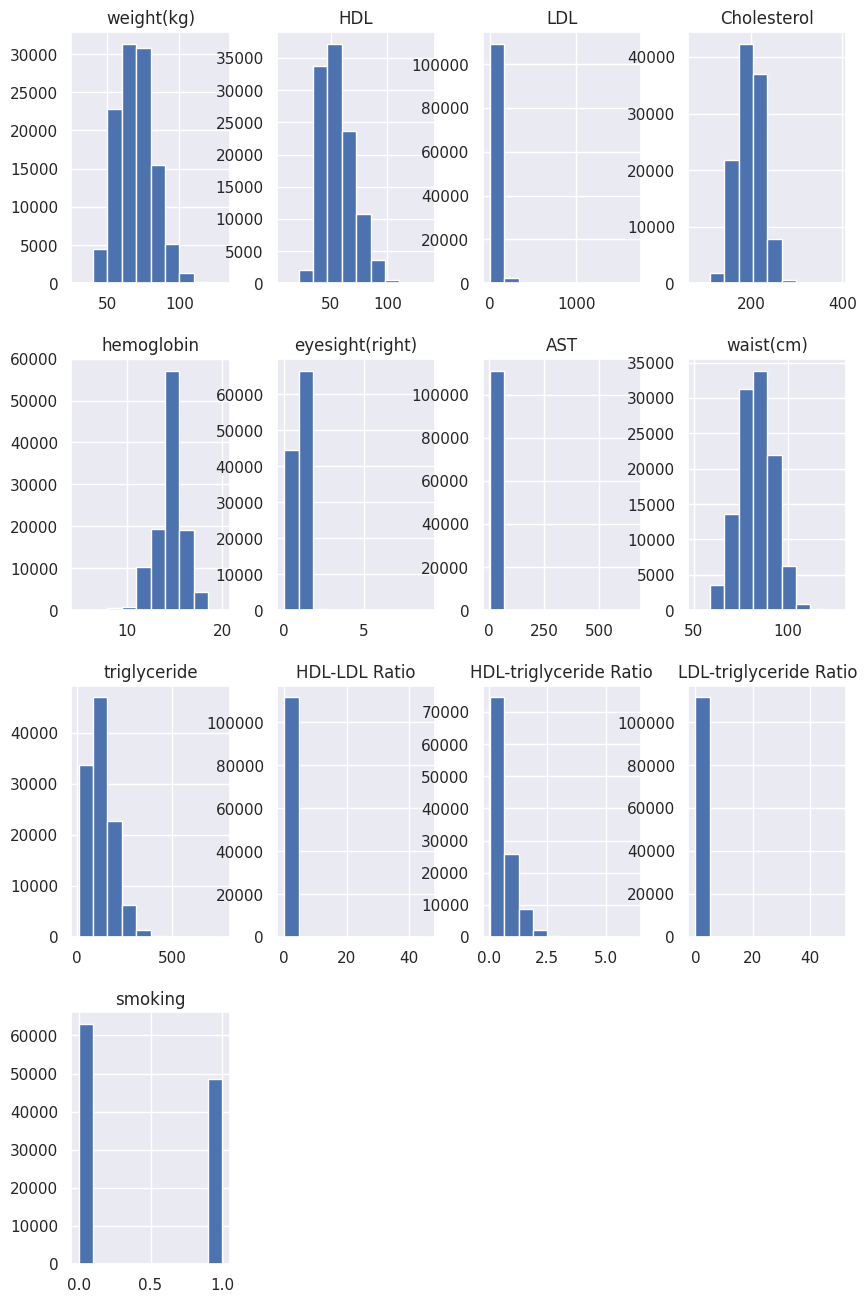

In [107]:
sns.set(rc={'figure.figsize':(10,16)})
non_cat_data.hist()


In [109]:
statistics = pd.DataFrame({
    'Mean': x.mean(),
    'Median': x.median(),
    'Range': x.max() - x.min(),
    'Variance': x.var(),
    'Standard Deviation': x.std()
})

In [110]:
print(statistics)

                              Mean      Median        Range     Variance  \
weight(kg)               67.111887   65.000000   100.000000   157.678819   
HDL                      55.855524   54.000000   127.000000   194.703521   
LDL                     114.588425  114.000000  1659.000000   789.943757   
Cholesterol             195.776505  196.000000   316.000000   808.096312   
hemoglobin               14.339598   15.000000    15.000000     2.121078   
eyesight(right)           0.610806    1.000000     9.000000     0.295583   
AST                      25.529427   24.000000   650.000000    90.384697   
waist(cm)                82.904870   83.000000    76.000000    79.902709   
triglyceride            127.597601  114.000000   758.000000  4392.355997   
hearing(left)_1           0.976552    1.000000     1.000000     0.022899   
hearing(left)_2           0.023448    0.000000     1.000000     0.022899   
HDL-LDL Ratio             0.521115    0.466667    45.966393     0.077438   
HDL-triglyce

In [111]:
statistics.to_csv('statistics_summary_2.csv')

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


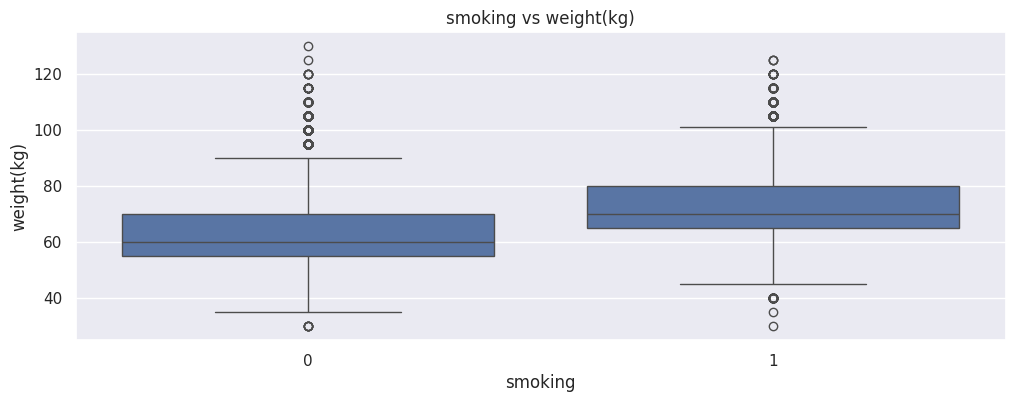

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


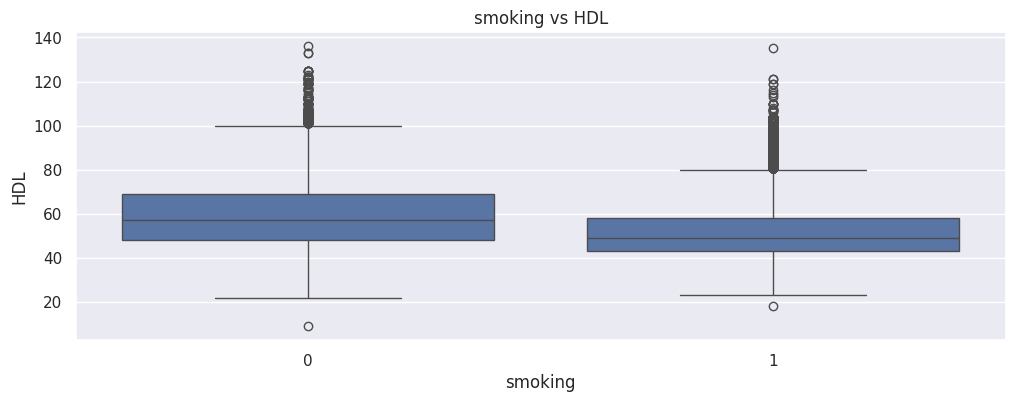

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


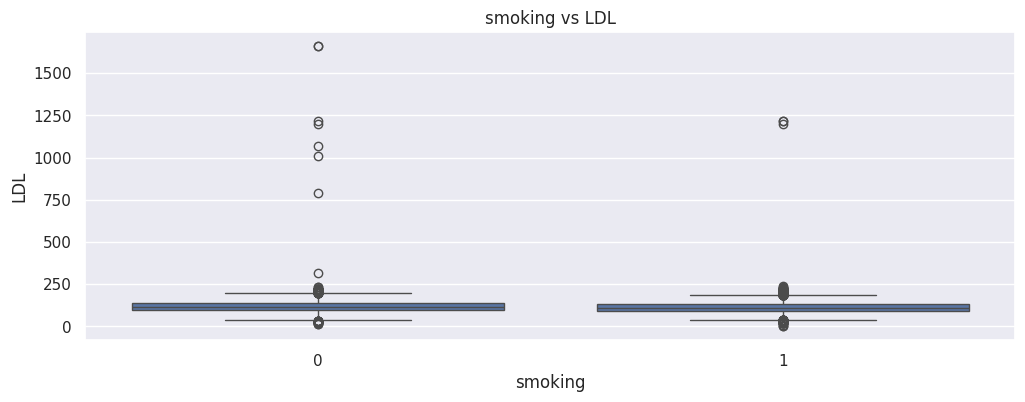

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


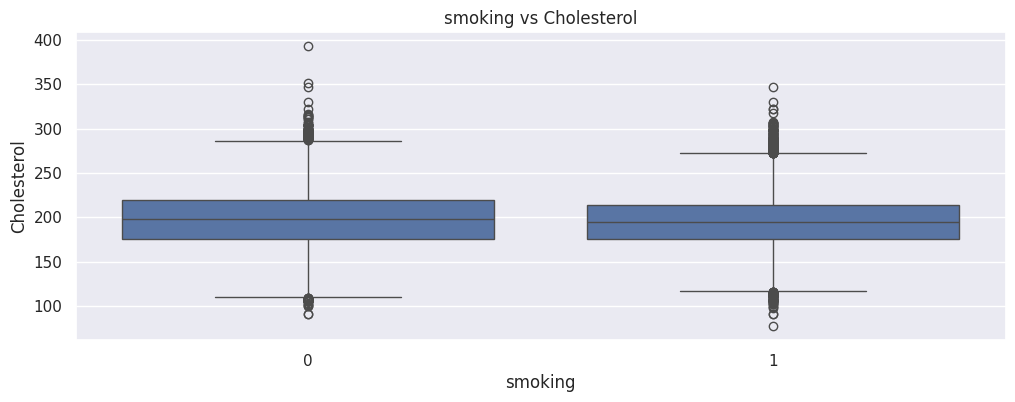

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


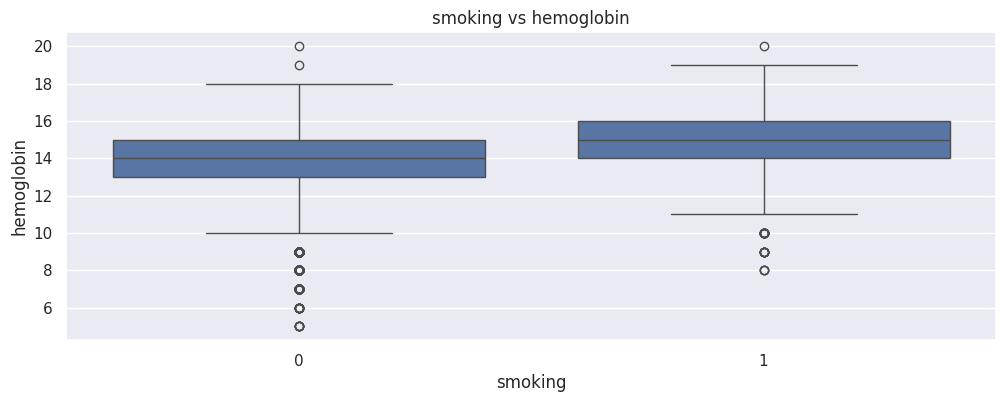

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


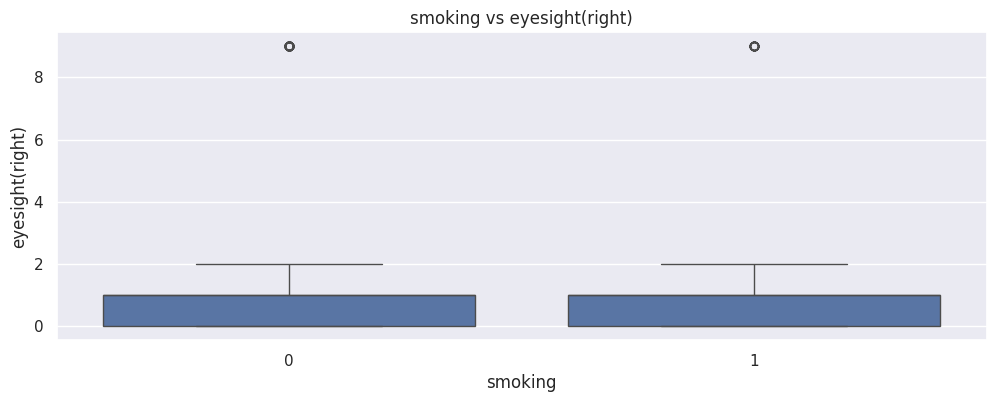

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


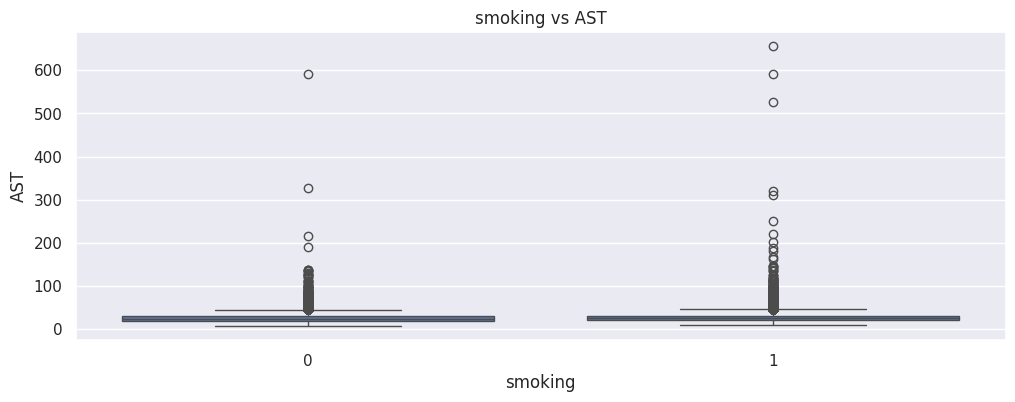

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


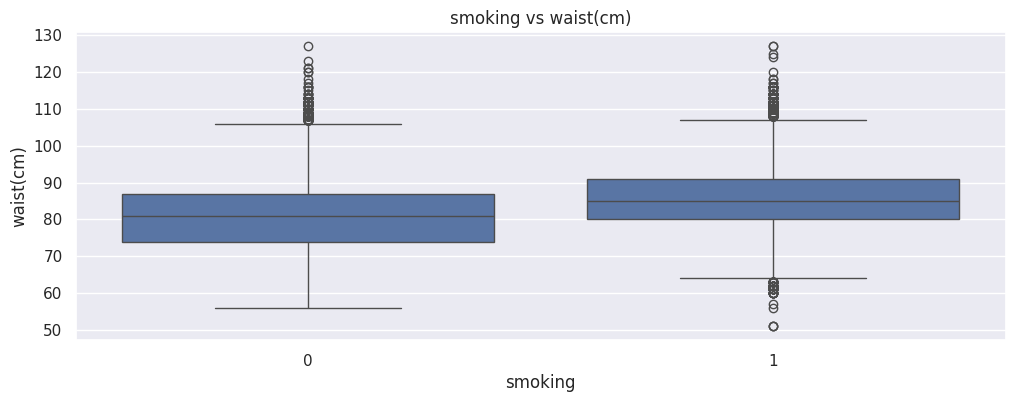

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


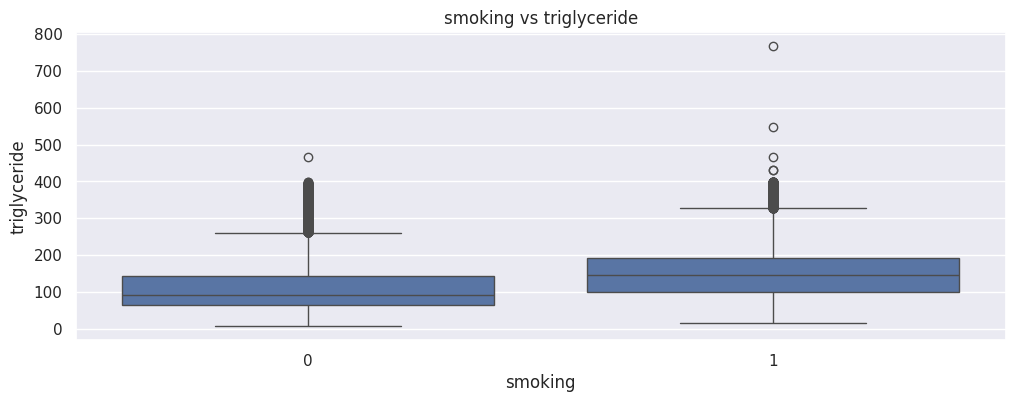

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


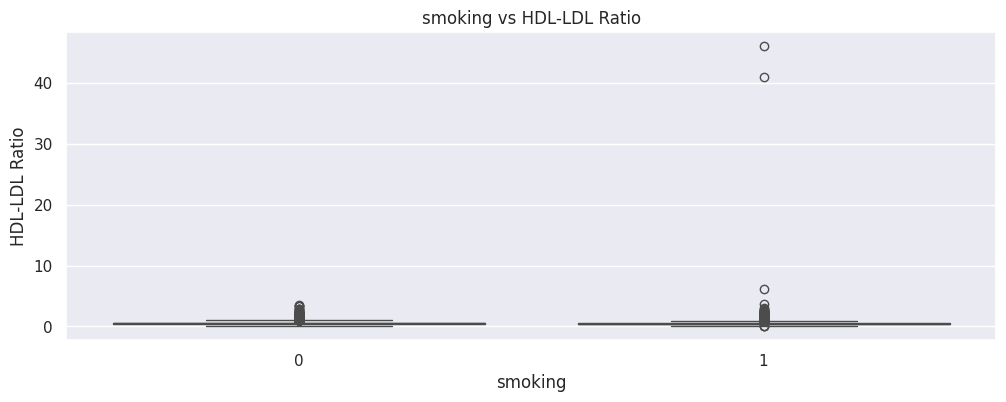

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


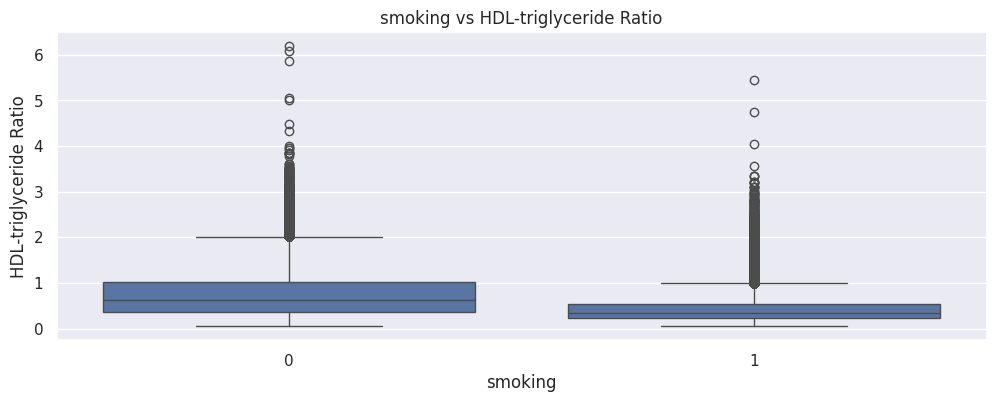

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


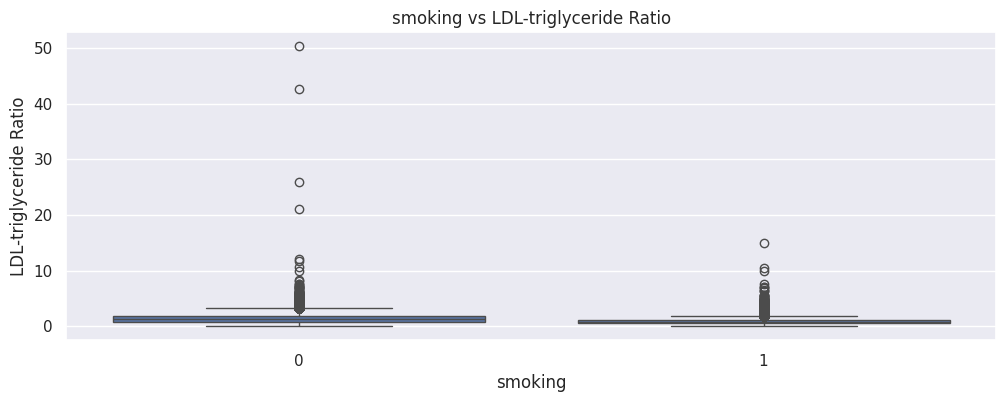

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


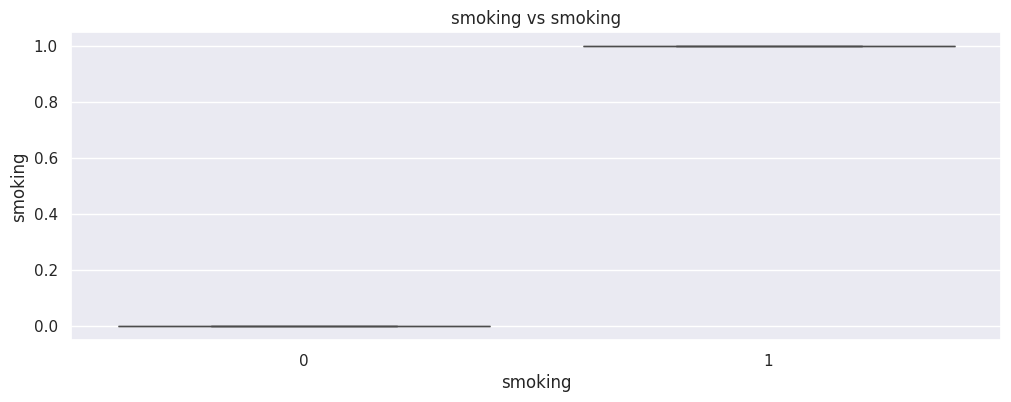

In [108]:
for i,feat in enumerate(non_cat_data):
    plt.figure(figsize=(12,4))
    sns.boxplot(data=non_cat_data, x='smoking', y=feat)
    plt.title('smoking vs ' + feat)
    plt.show()

### Multivariate Analysis

pca to determine how many principle components in dimensinality reduction

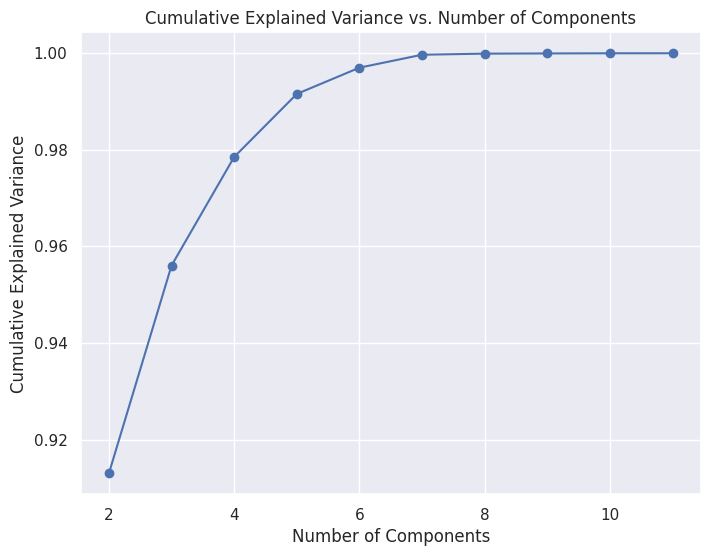

In [102]:

components_range = range(2, 12)

# List to store cumulative explained variance
cumulative_variance = []

# Perform PCA for different numbers of components
for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(x)
    cumulative_variance.append(np.sum(pca.explained_variance_ratio_))

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(components_range, cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()